<h1 style='color:purple' align='center'> Breast Mass is Malignant or Benign</h1>

# Objective : Breast Cancer Wisconsin Classification

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)

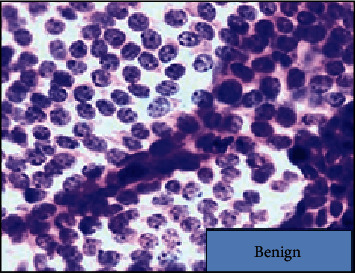


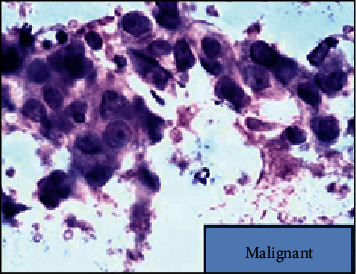

# 1. Load Python Modules

In [26]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,roc_curve,auc, classification_report


# 2. Read the Dataset from CSV file  - Using Pandas

In [27]:
file_path=r"data.csv"
cvs=True
excel=False

if cvs:
    cancer_df = pd.read_csv(file_path)
elif excel:
    cancer_df = pd.read_excel(file_path)  
else:
    print("Filt Type is not specified")

cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
#drop - sensitive - non imp columns
cancer_df.drop(['id'],axis=1,inplace=True)
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Observations
1. dropped  the columns : 'id'

# 3. Basic Inspection on given dataset

In [29]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(cancer_df)

top 5 rows - using head
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...        

## Observations


In [30]:
#drop - due to huge null values and non imp features
cancer_df.drop(['Unnamed: 32'],axis=1,inplace=True)
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 4. Handling Missing Values - Cat - Variables

In [31]:
# No Missing Values - I am skipping this section
cancer_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [32]:
cancer_df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# 5. Categorical- Variable - Analysis -Using Pipeline

In [33]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

diagnosis frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   B   |    357    |
| 1 |   M   |    212    |
+---+-------+-----------+
diagnosis Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   B   |    357    |        62.74         |
| 1 |   M   |    212    |        37.26         |
+---+-------+-----------+----------------------+


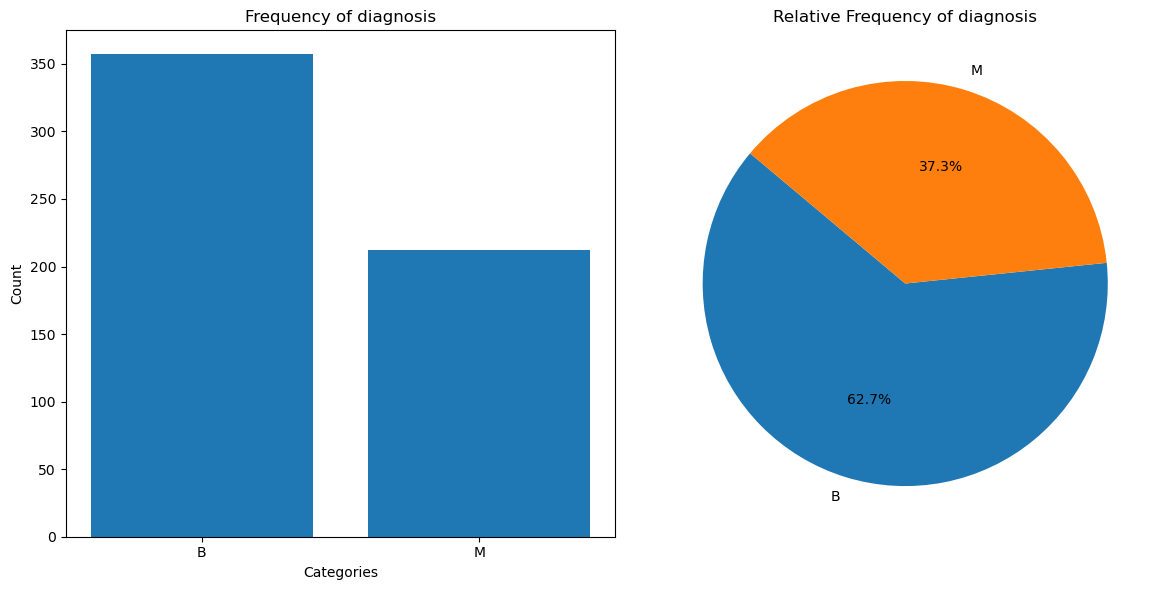

In [34]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(cancer_df)

## Observations
1. diagnosis   has two categories - with 'M - Malignant 'B- Benign' with 62% and 37%


# 6. Handling Missing Values in Numerical Columns

In [35]:
cancer_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [36]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                        
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var],  color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()

        
        

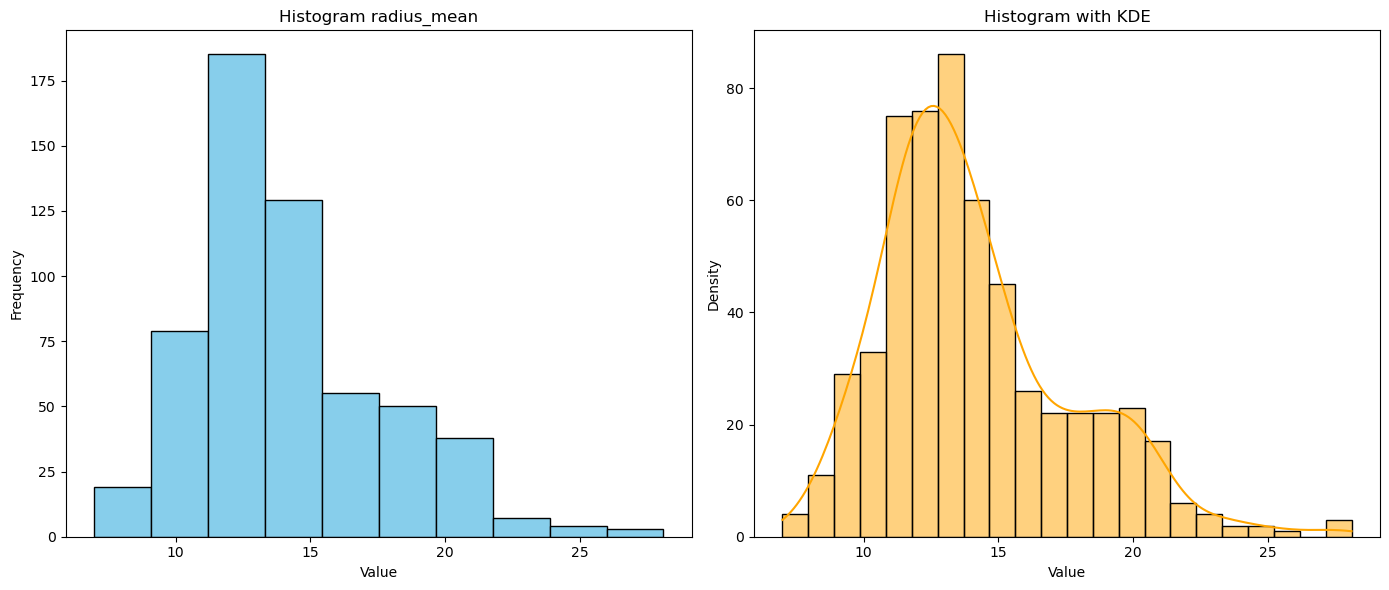

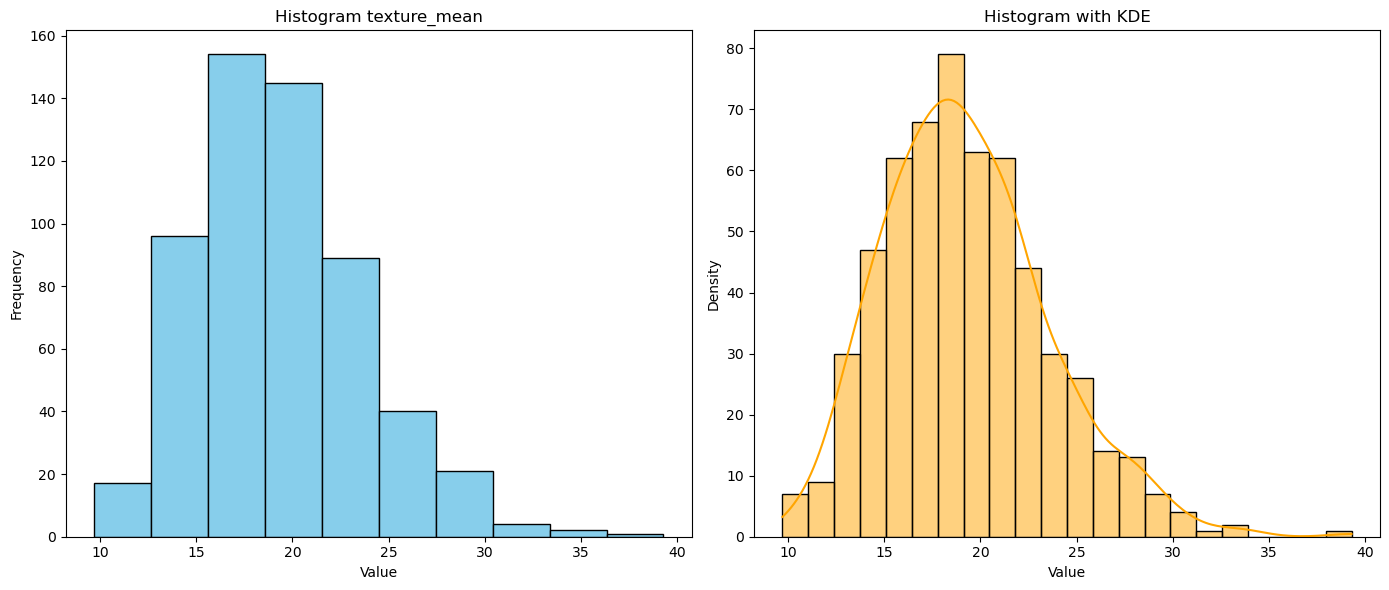

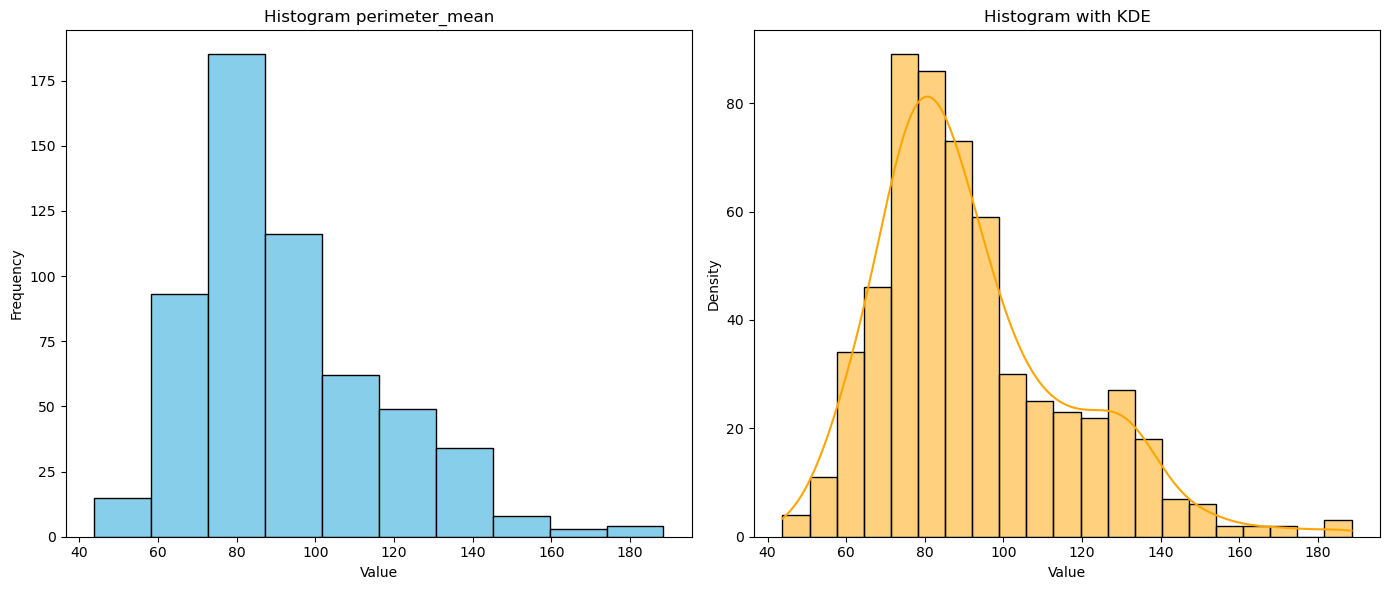

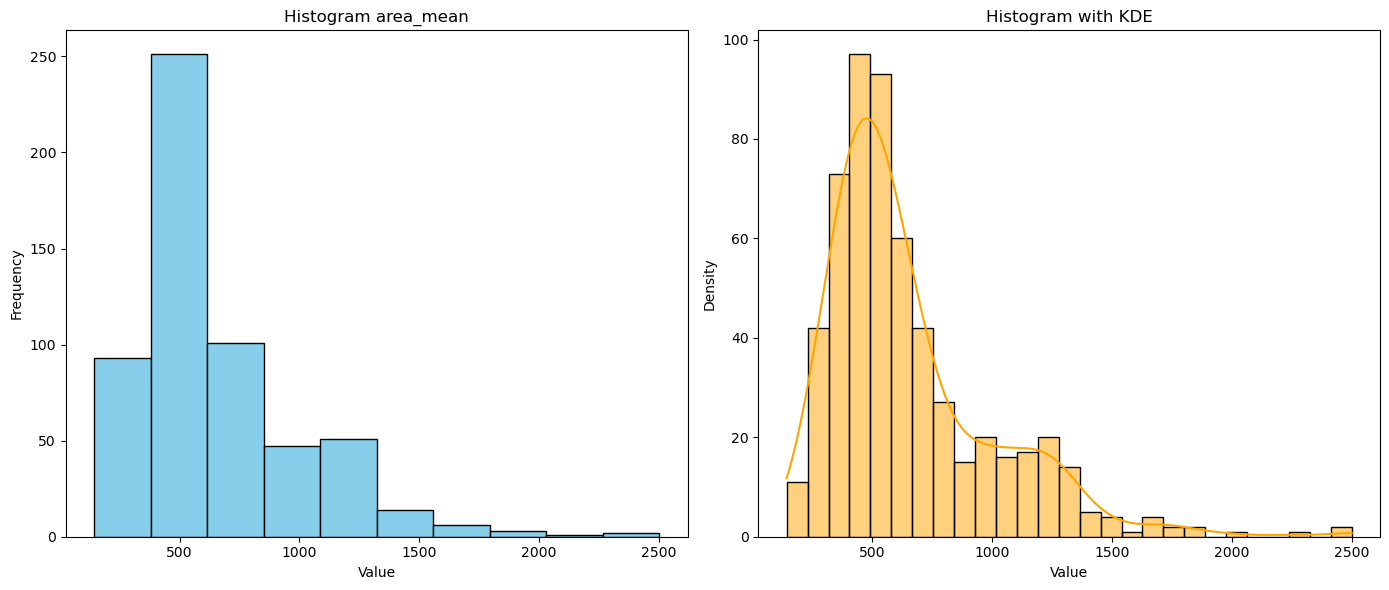

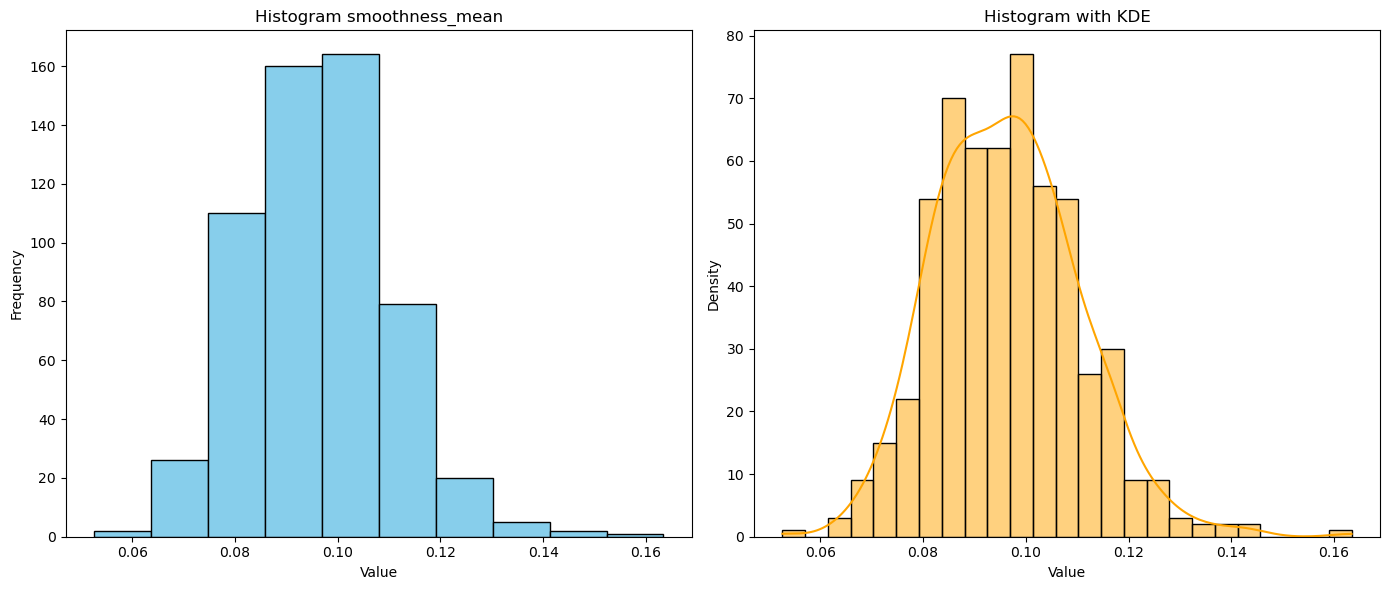

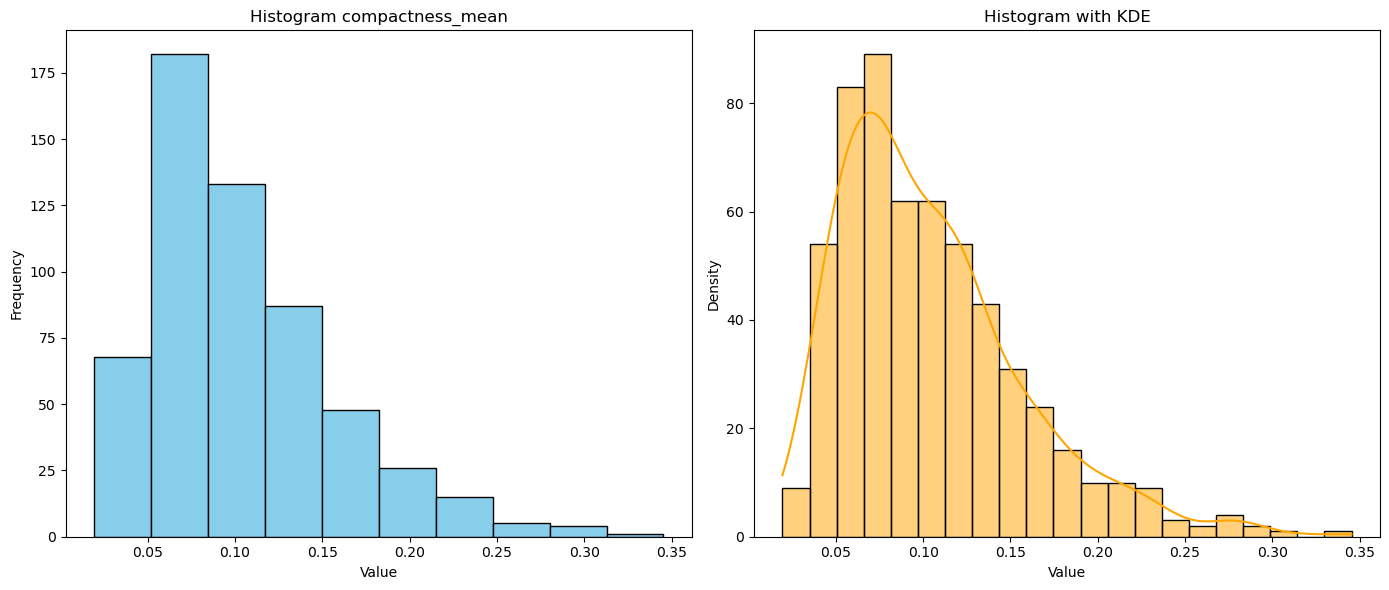

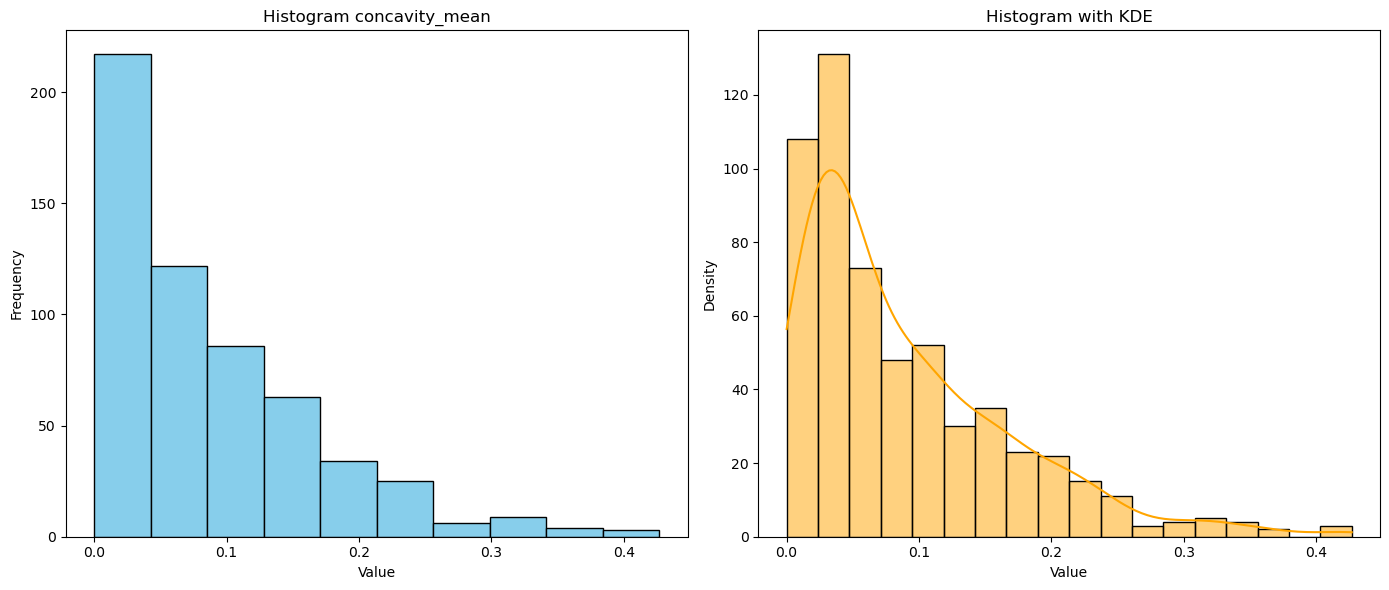

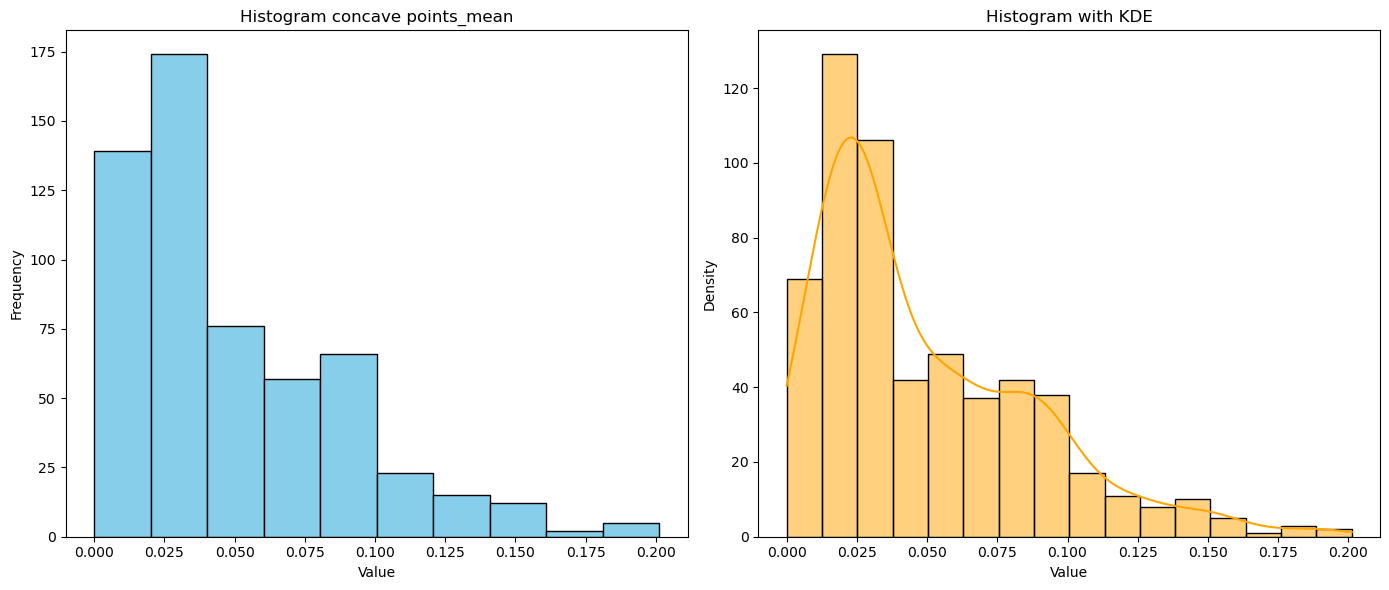

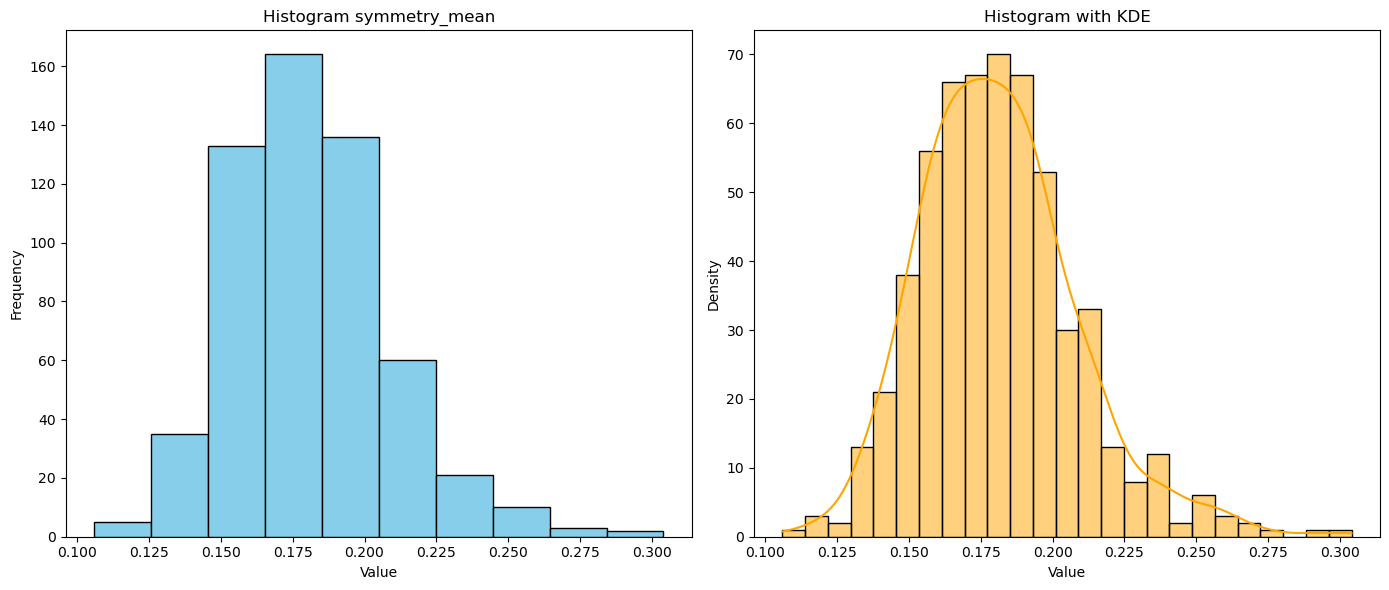

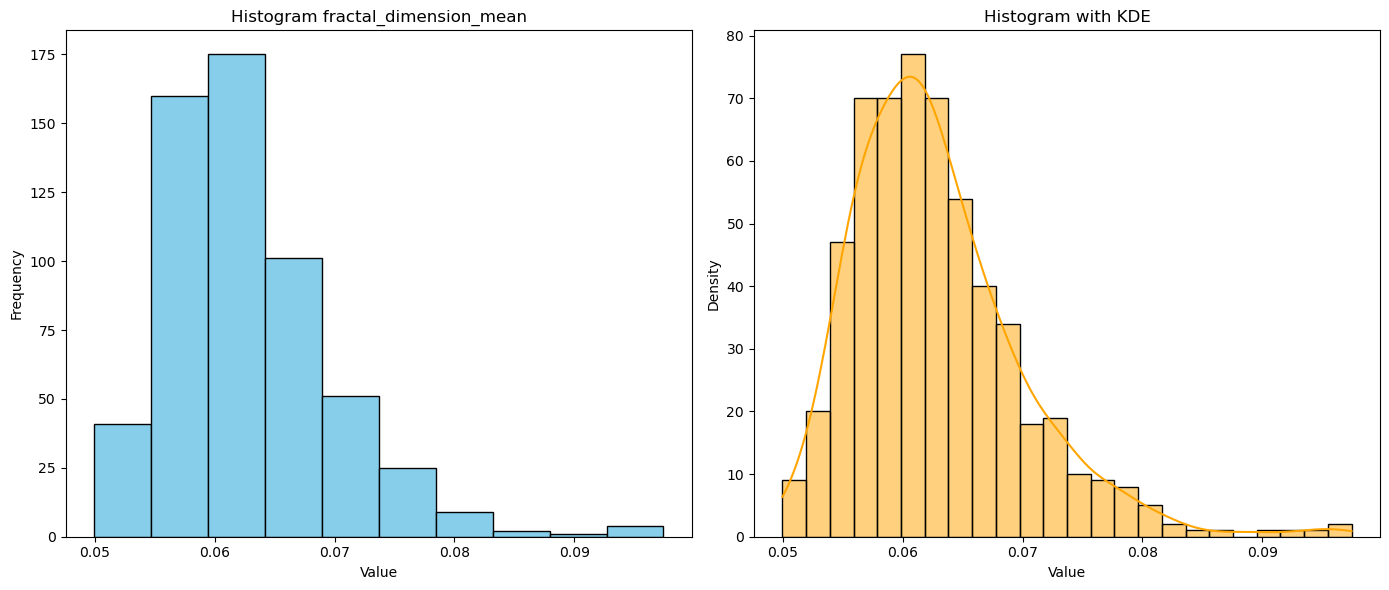

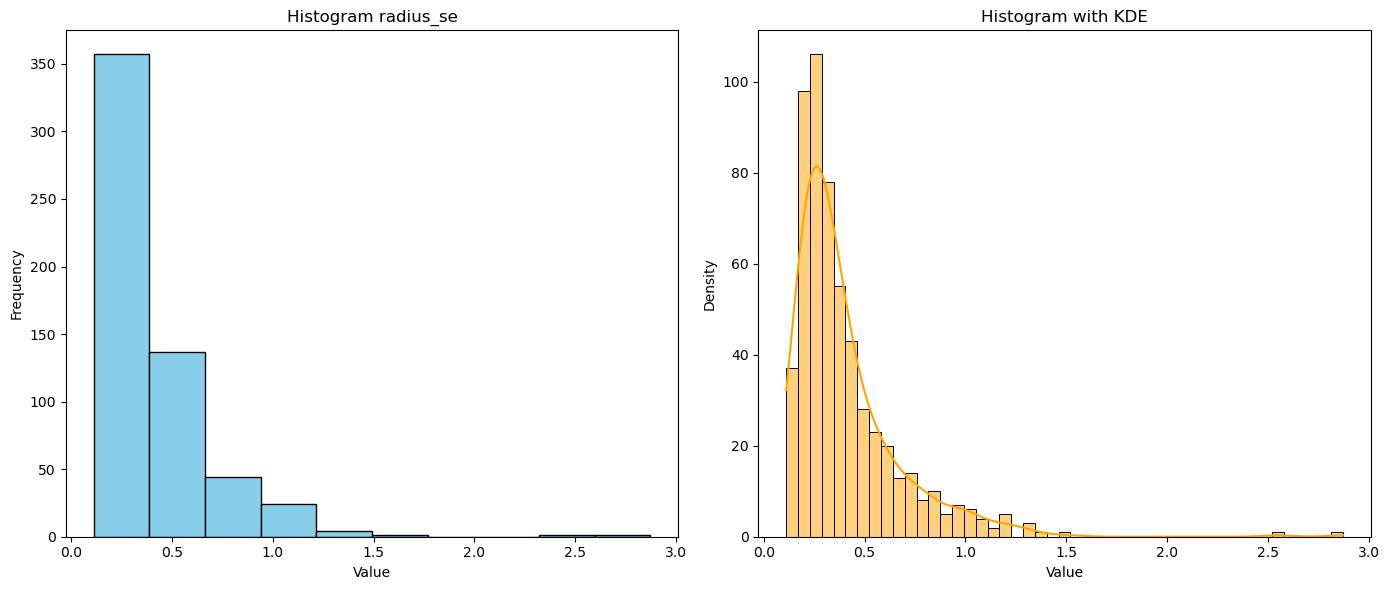

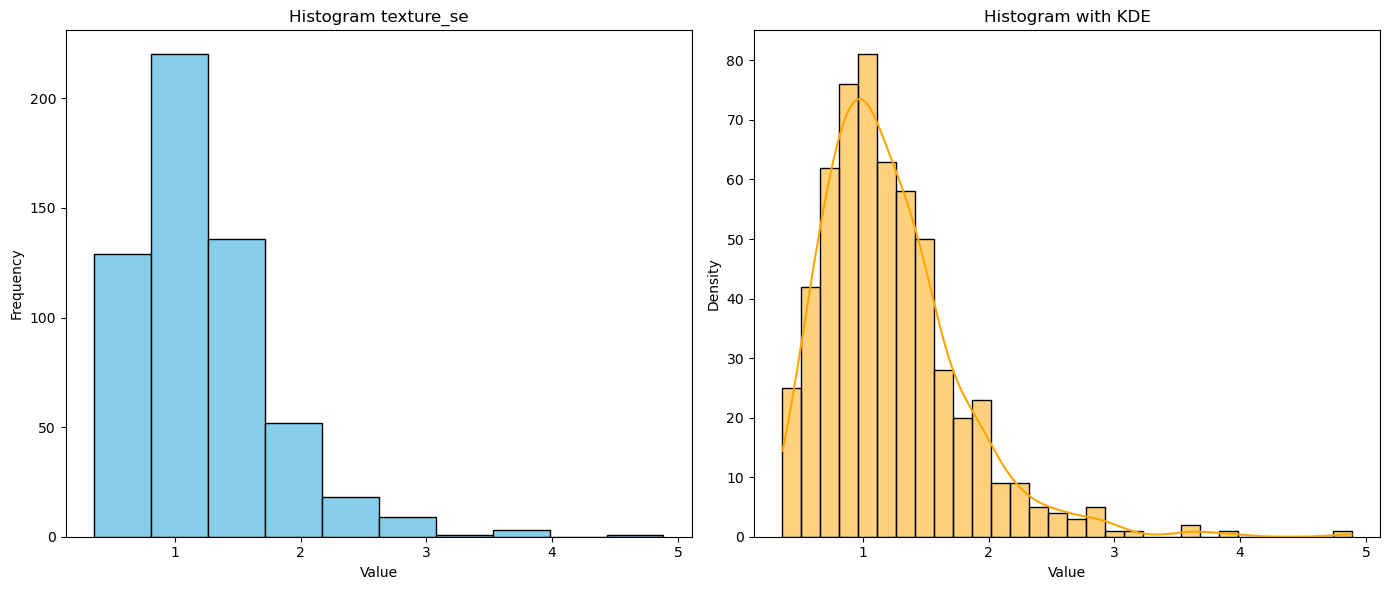

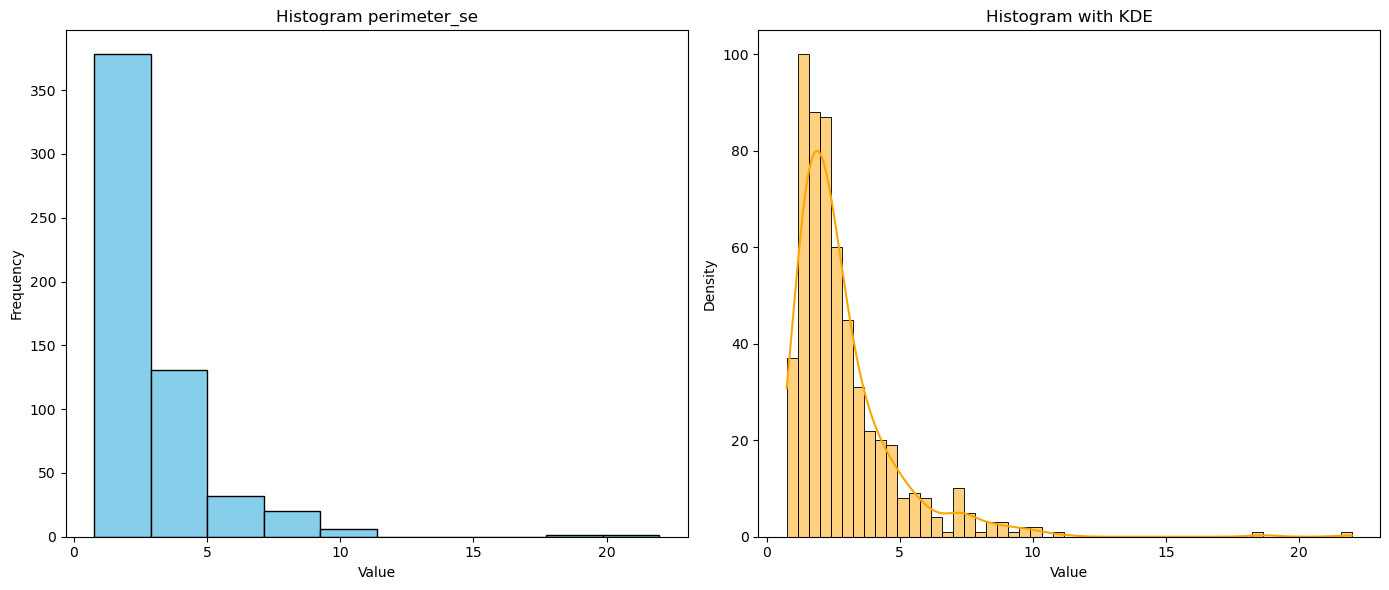

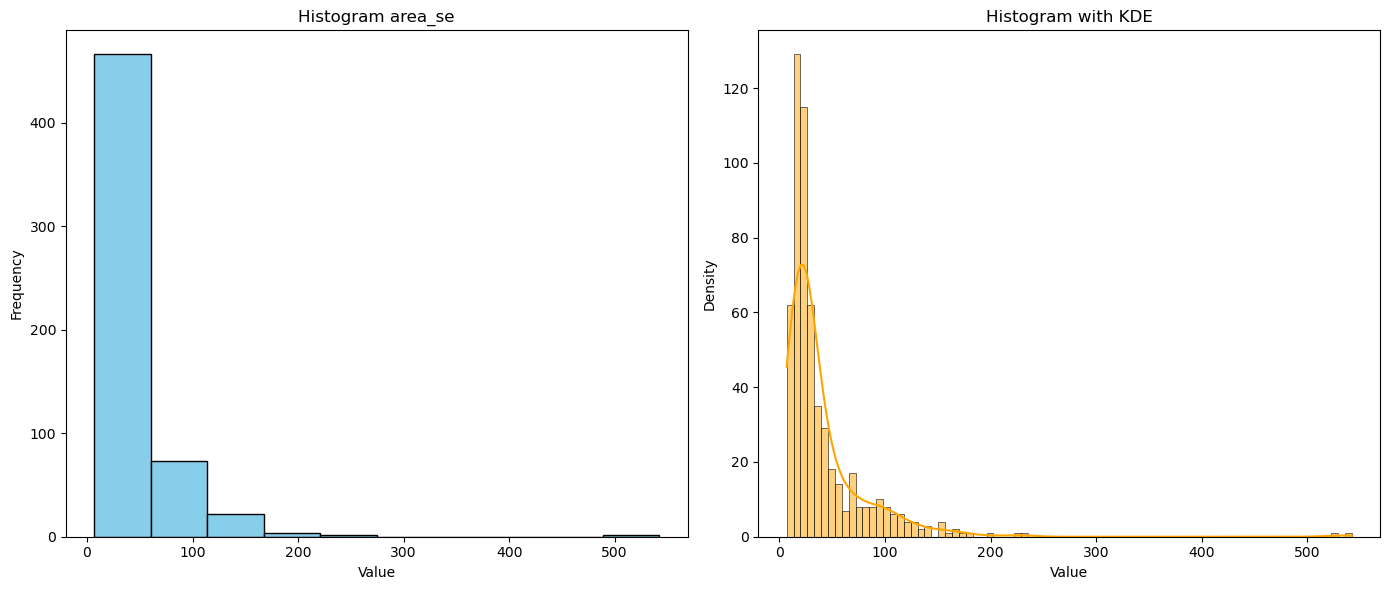

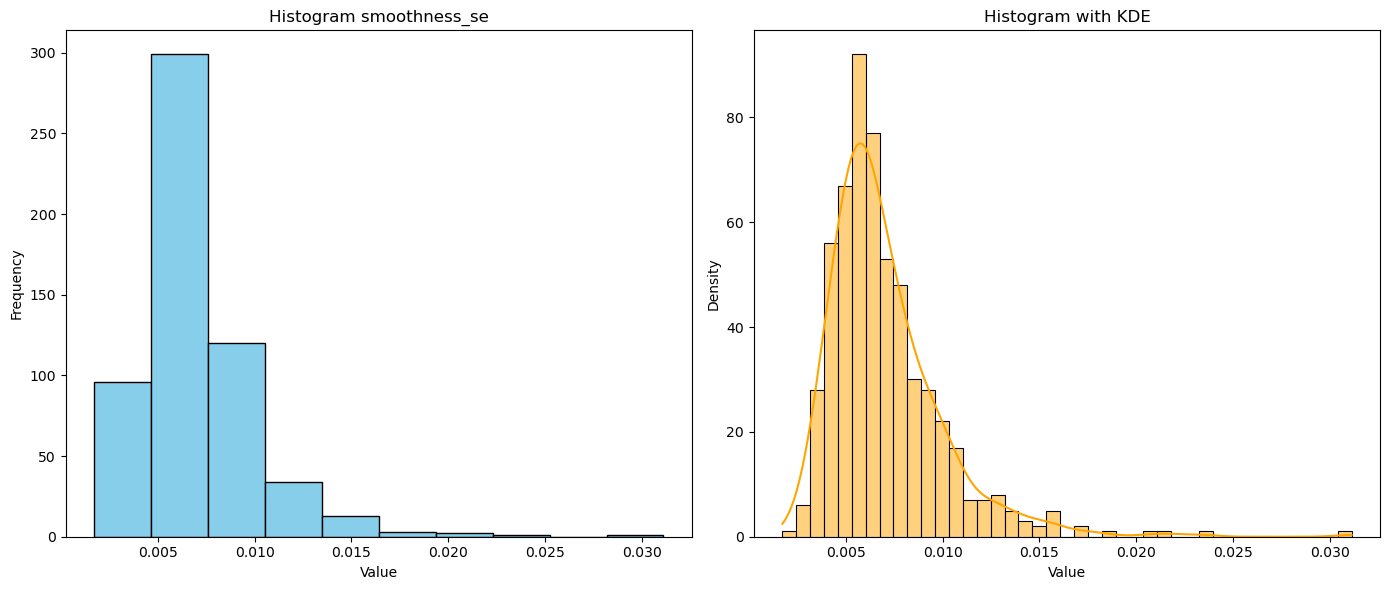

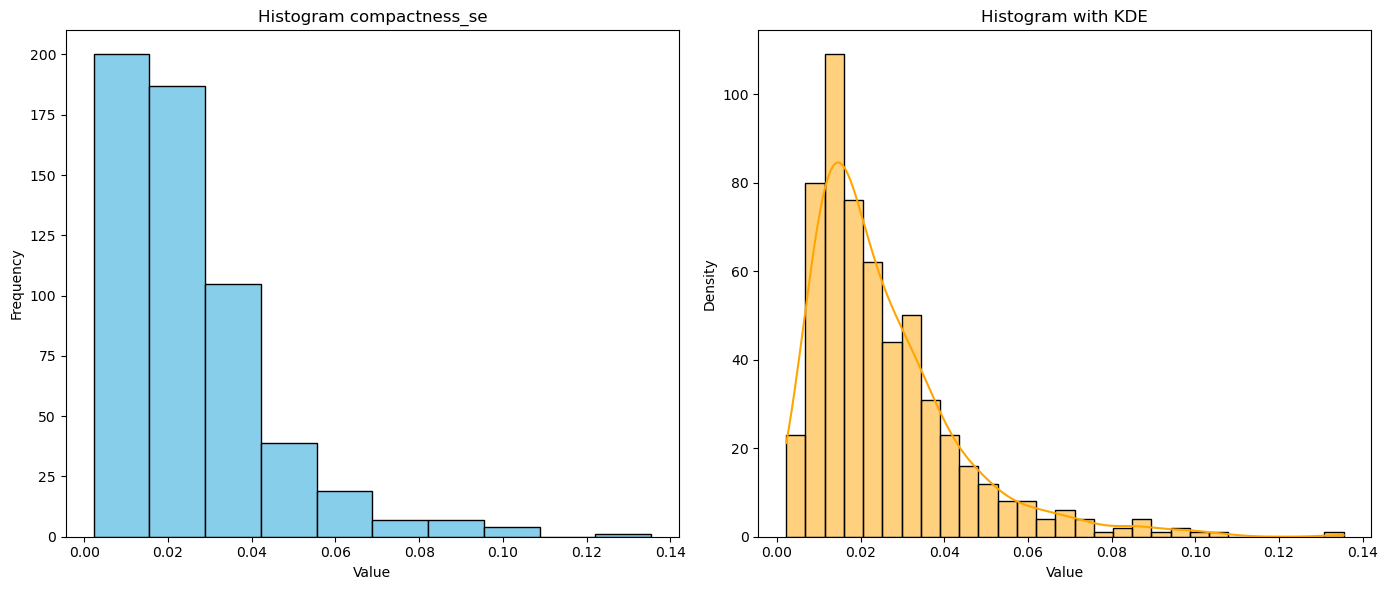

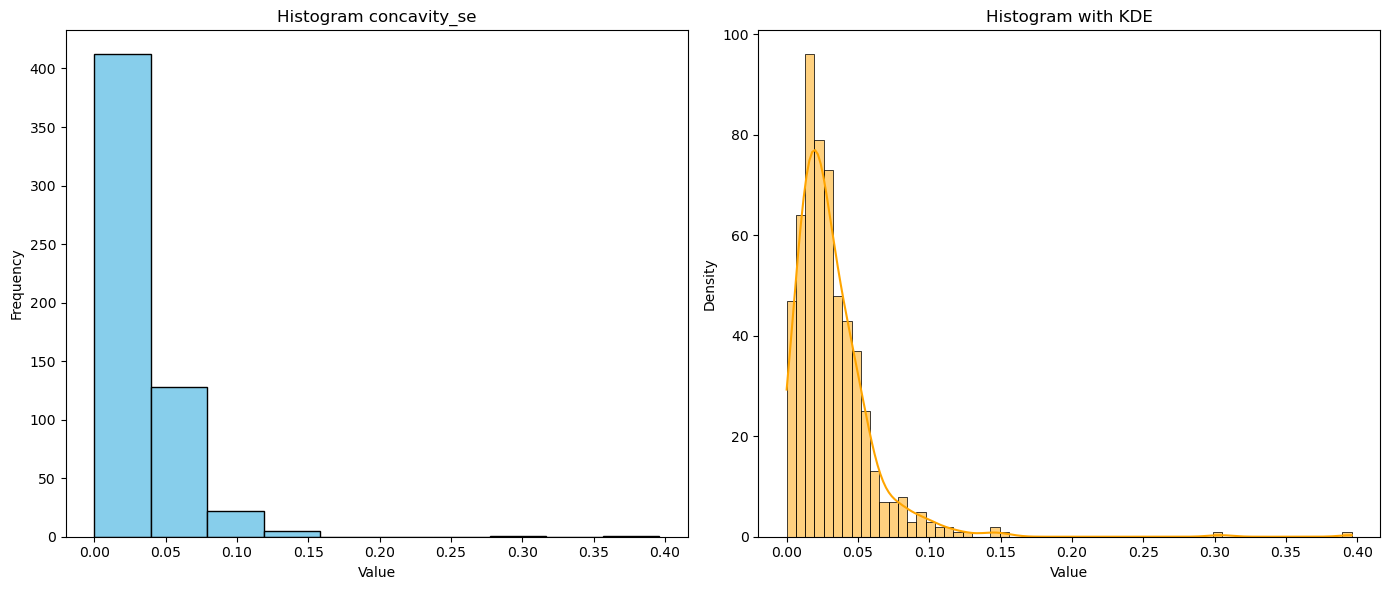

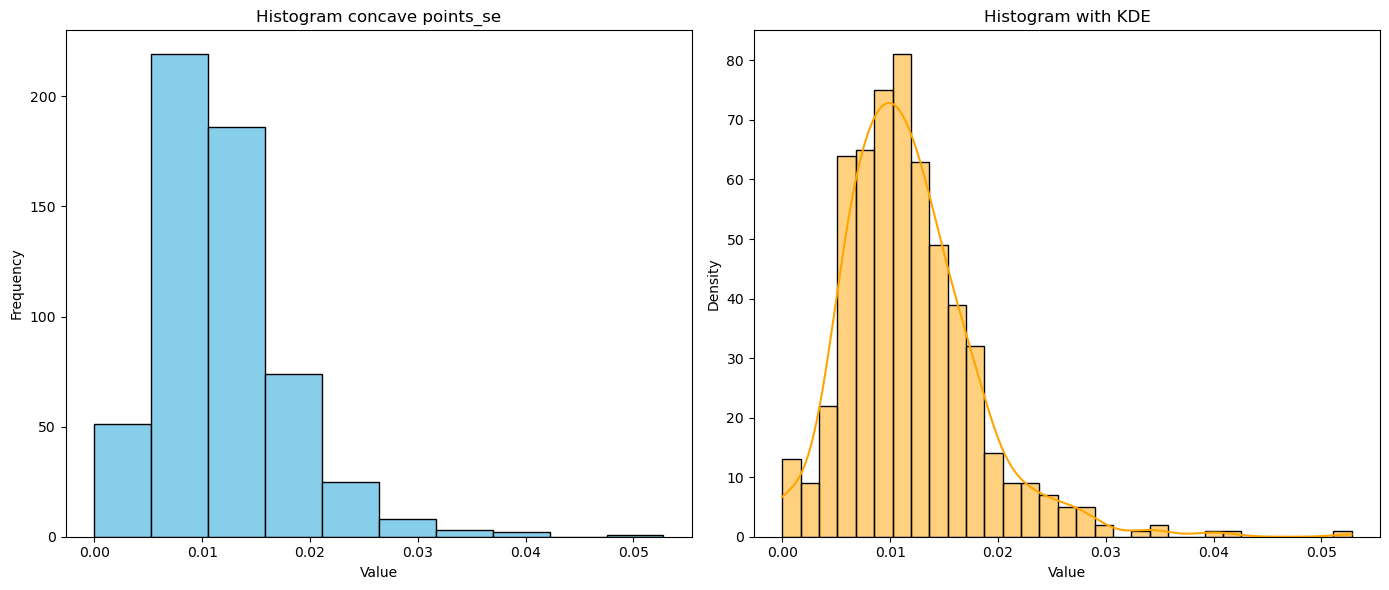

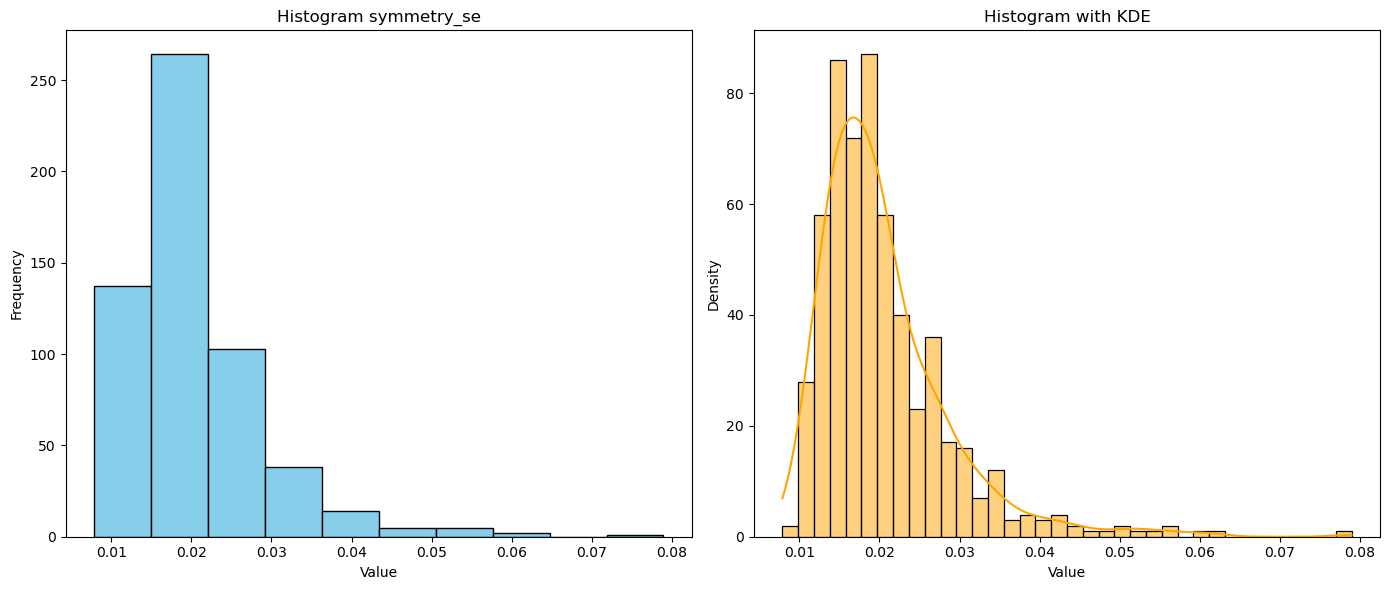

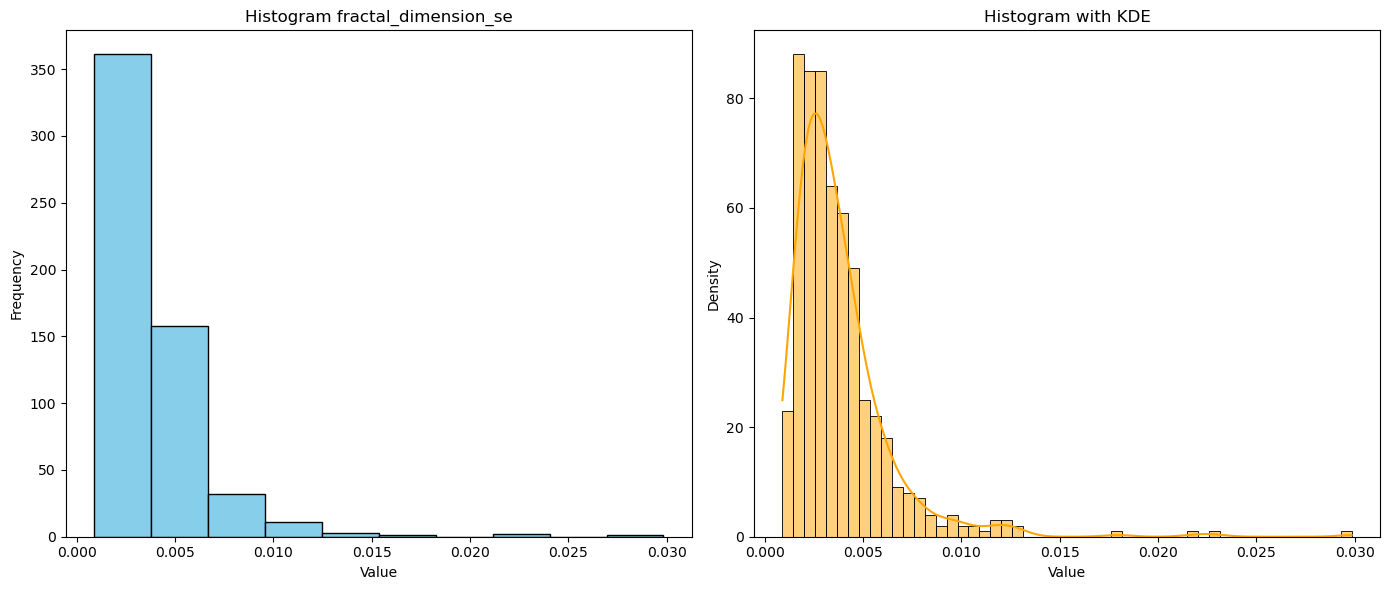

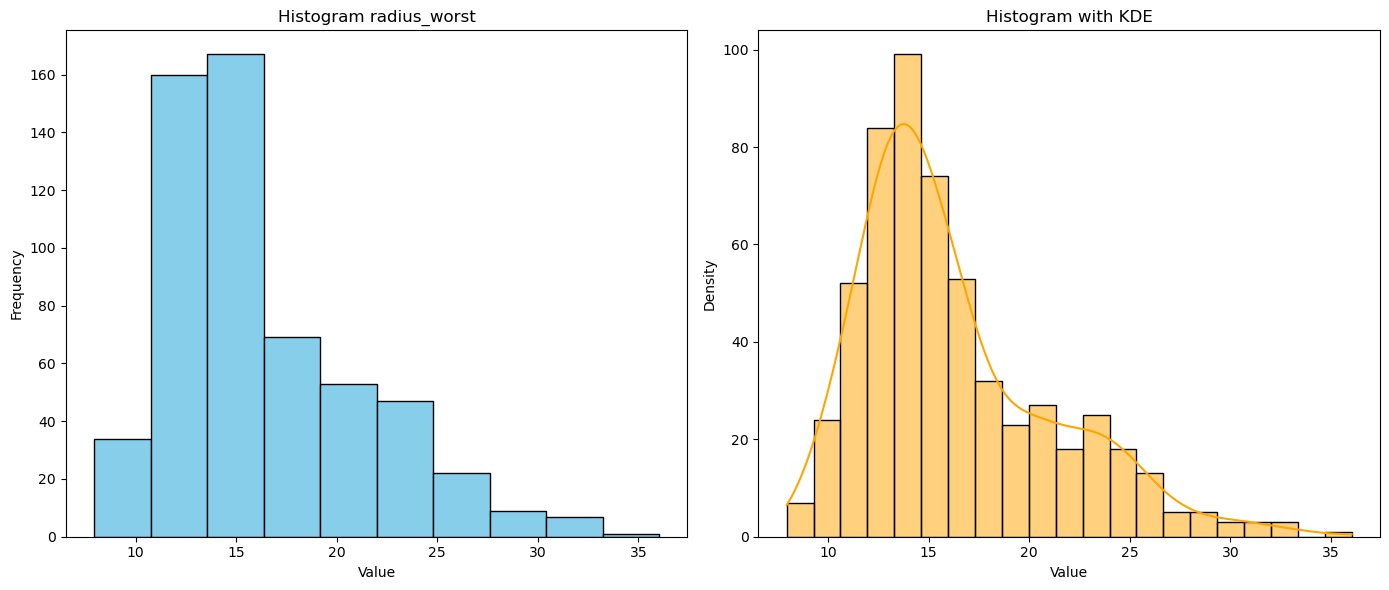

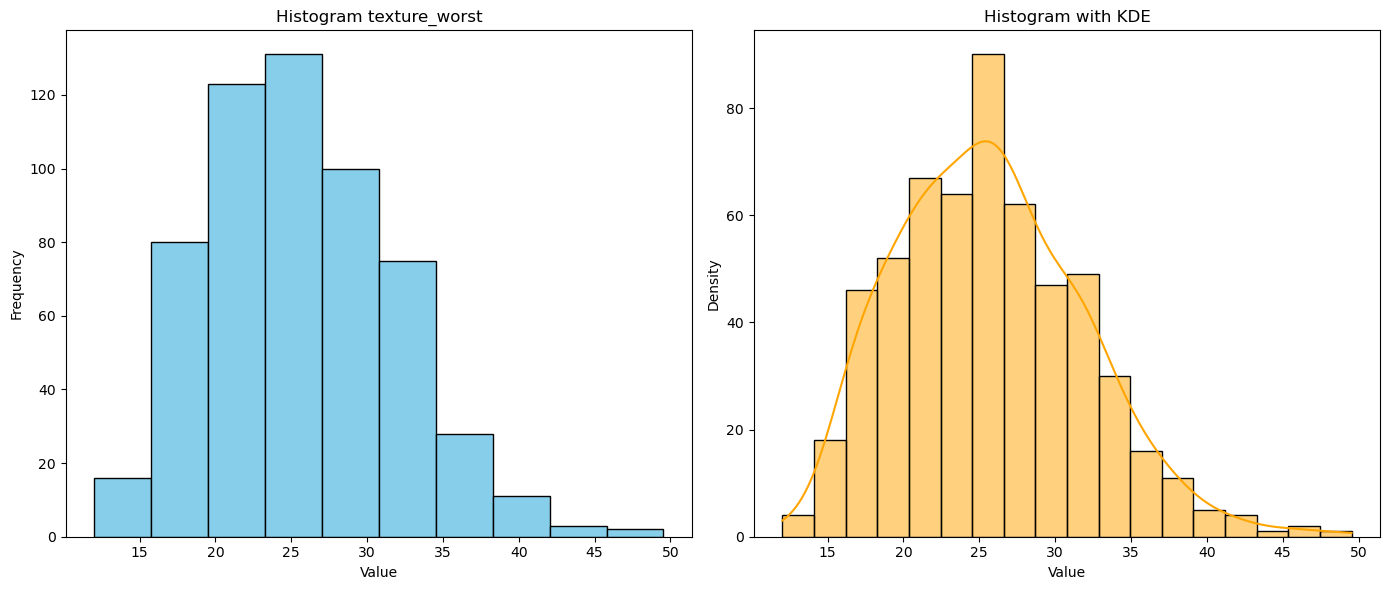

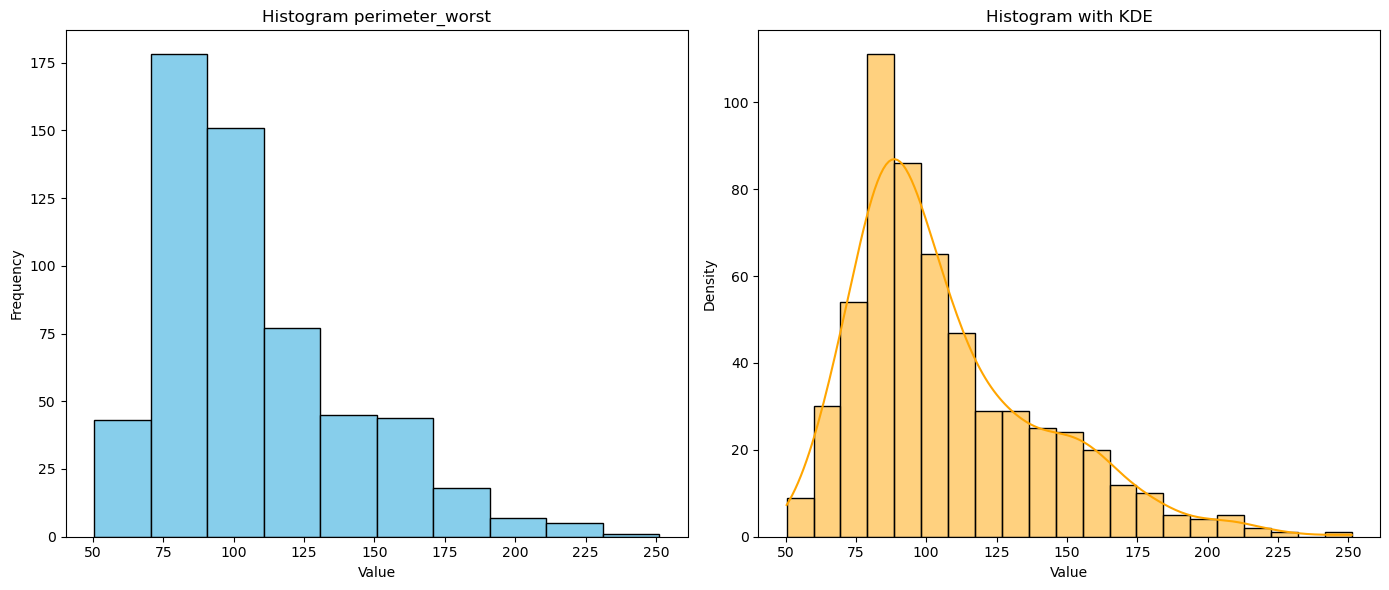

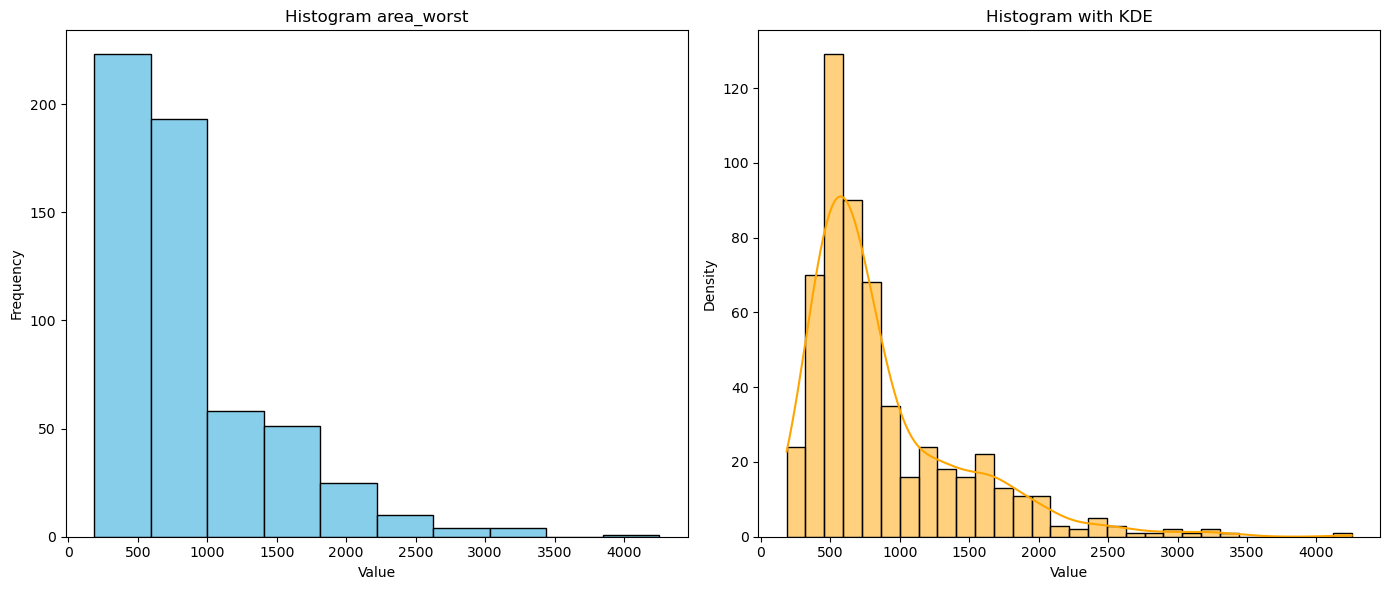

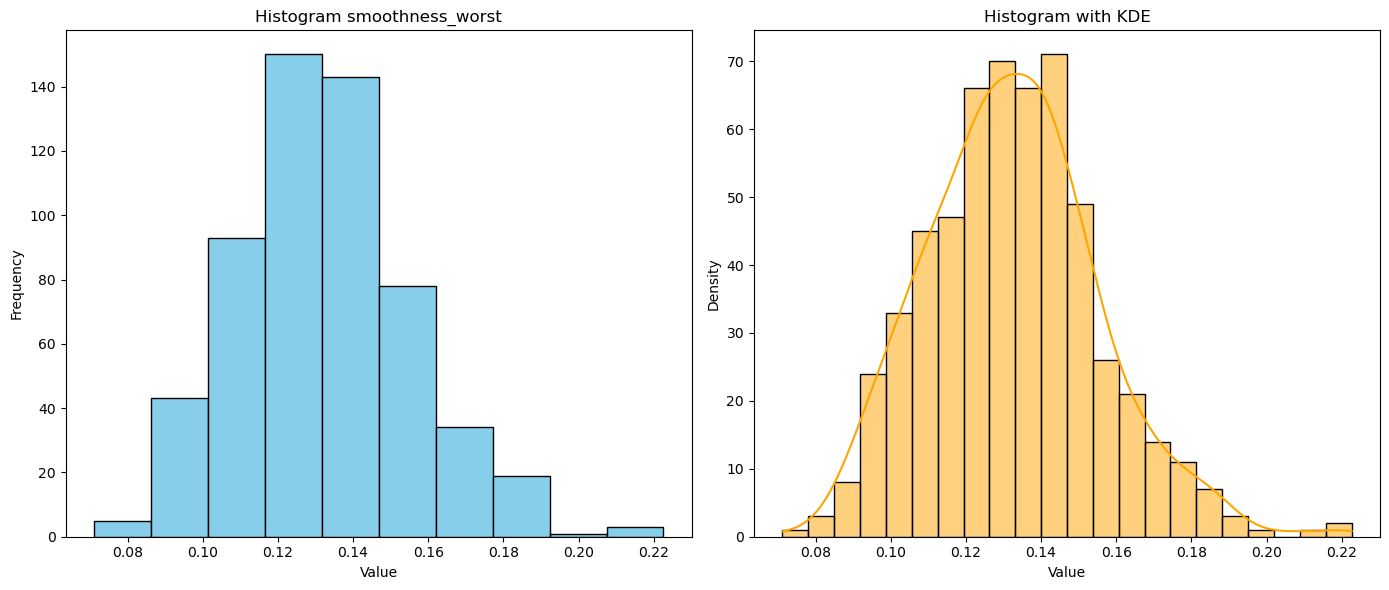

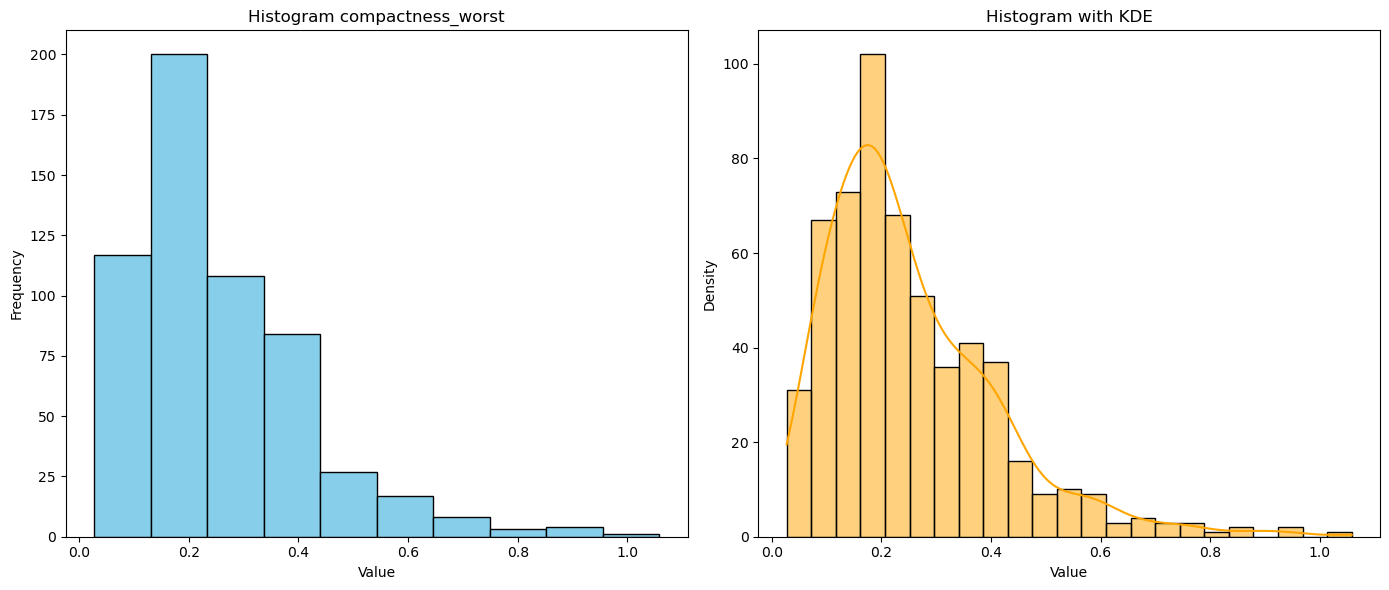

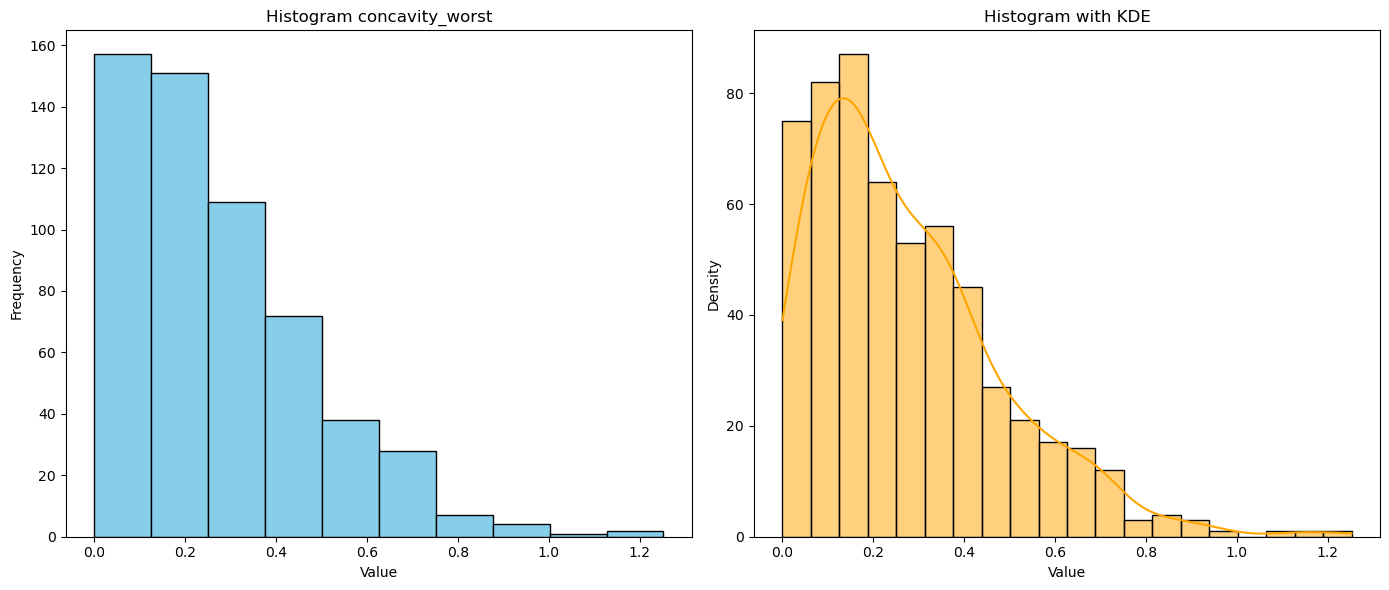

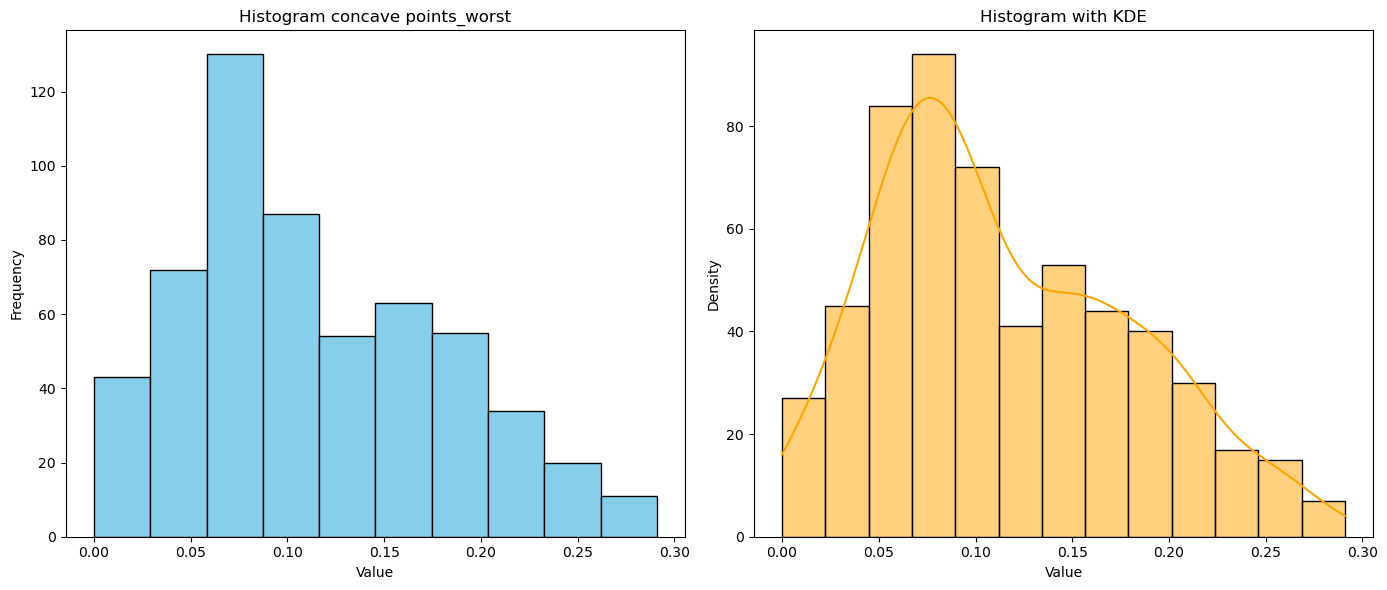

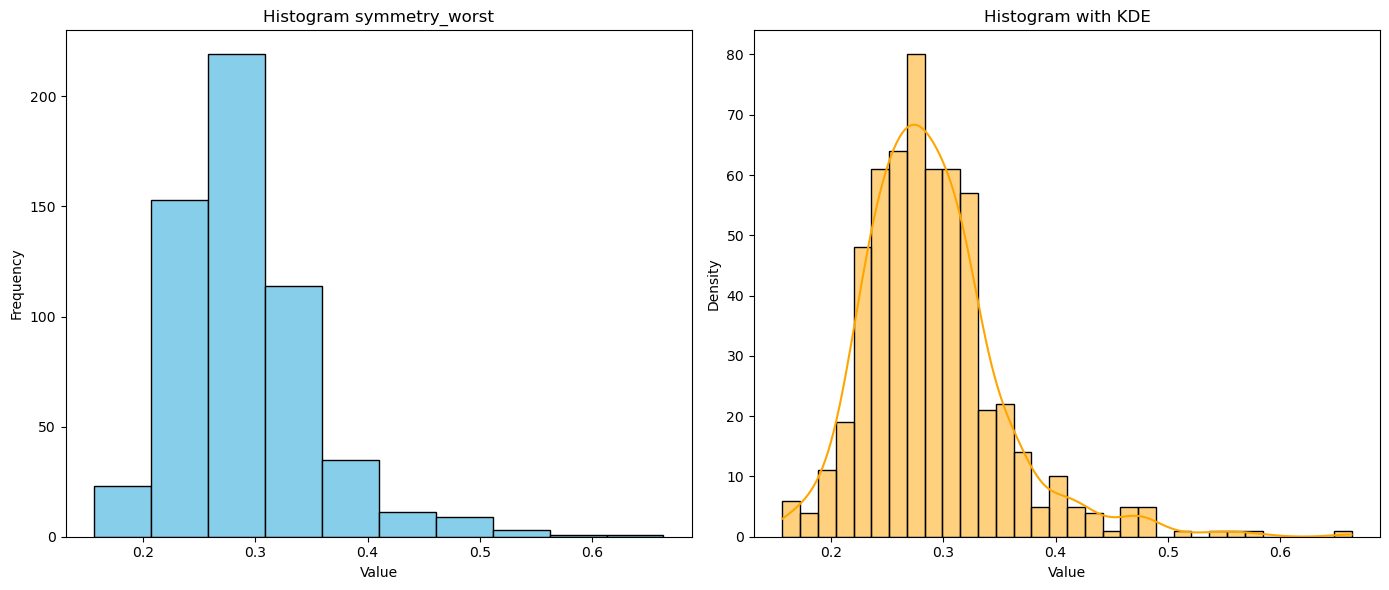

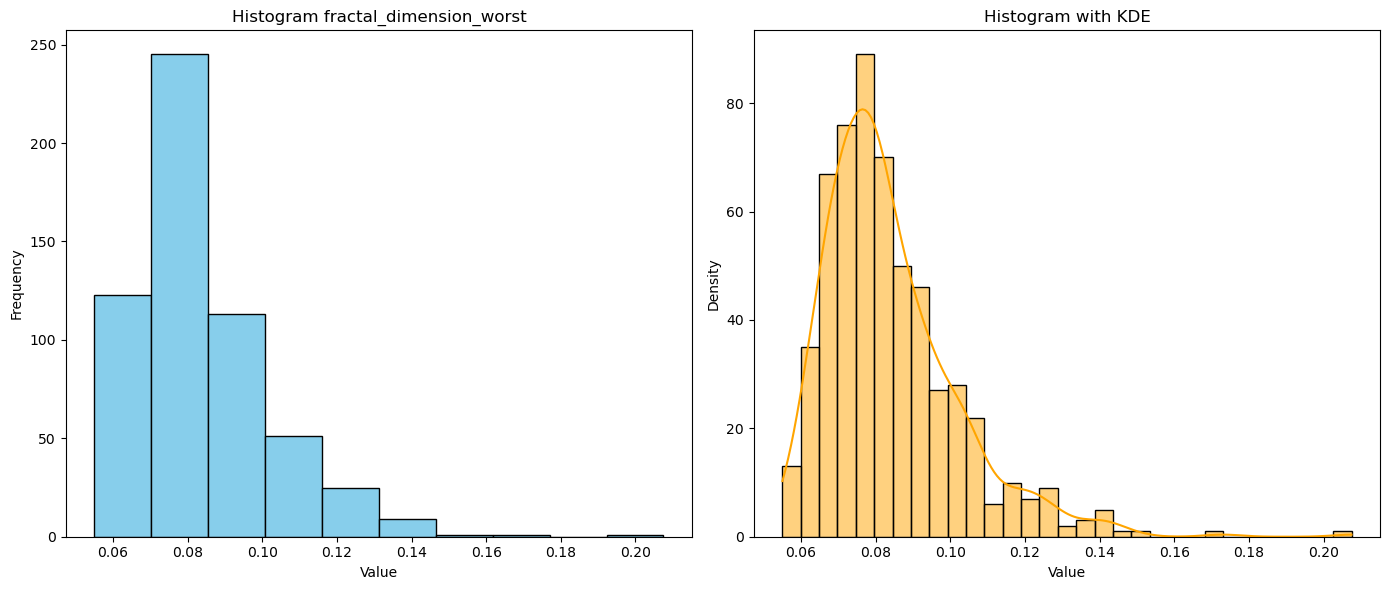

In [37]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(cancer_df)

## Observations
1.All feature are almost nomally distributed


# 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analyis

In [38]:
num_vars = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
len(num_vars)

31

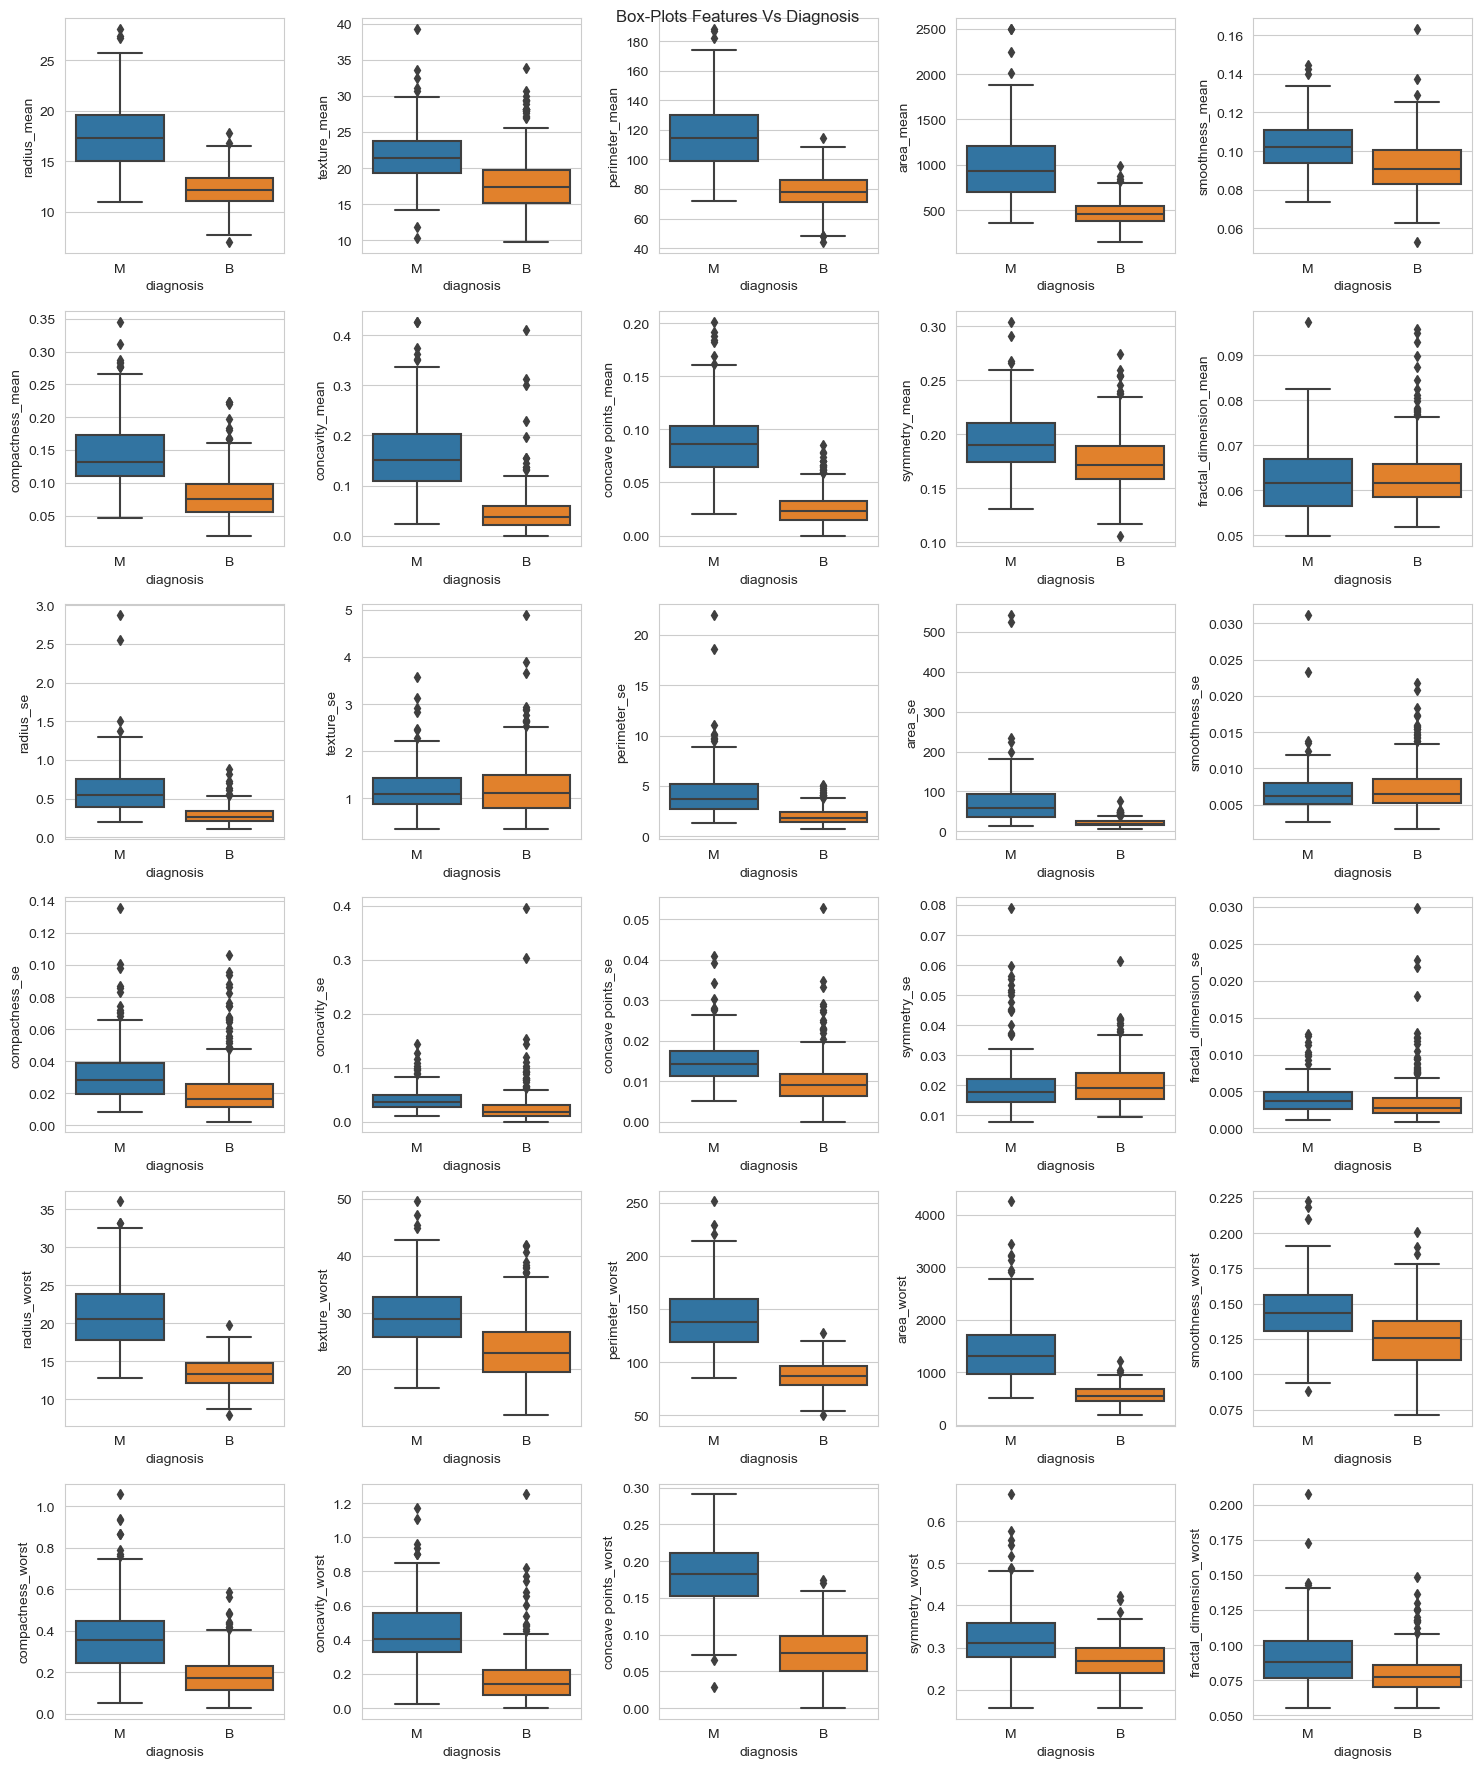

In [39]:
output_var='diagnosis'

# Assuming 'cancer_df' is your dataframe and 'diagnosis' is one of its columns
sns.set_style("whitegrid")

# List of numerical variables
num_vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
            'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
            'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
            'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Calculate the number of rows and columns for subplots
num_rows = len(num_vars) // 5 + (len(num_vars) % 5 > 0)  # Ensure we have enough rows
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.suptitle('Box-Plots Features Vs Diagnosis')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical variables and create box plots
for i, var in enumerate(num_vars):
    sns.boxplot(ax=axes[i], x='diagnosis', y=var, data=cancer_df)

# Hide any extra subplots
for j in range(len(num_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Observations


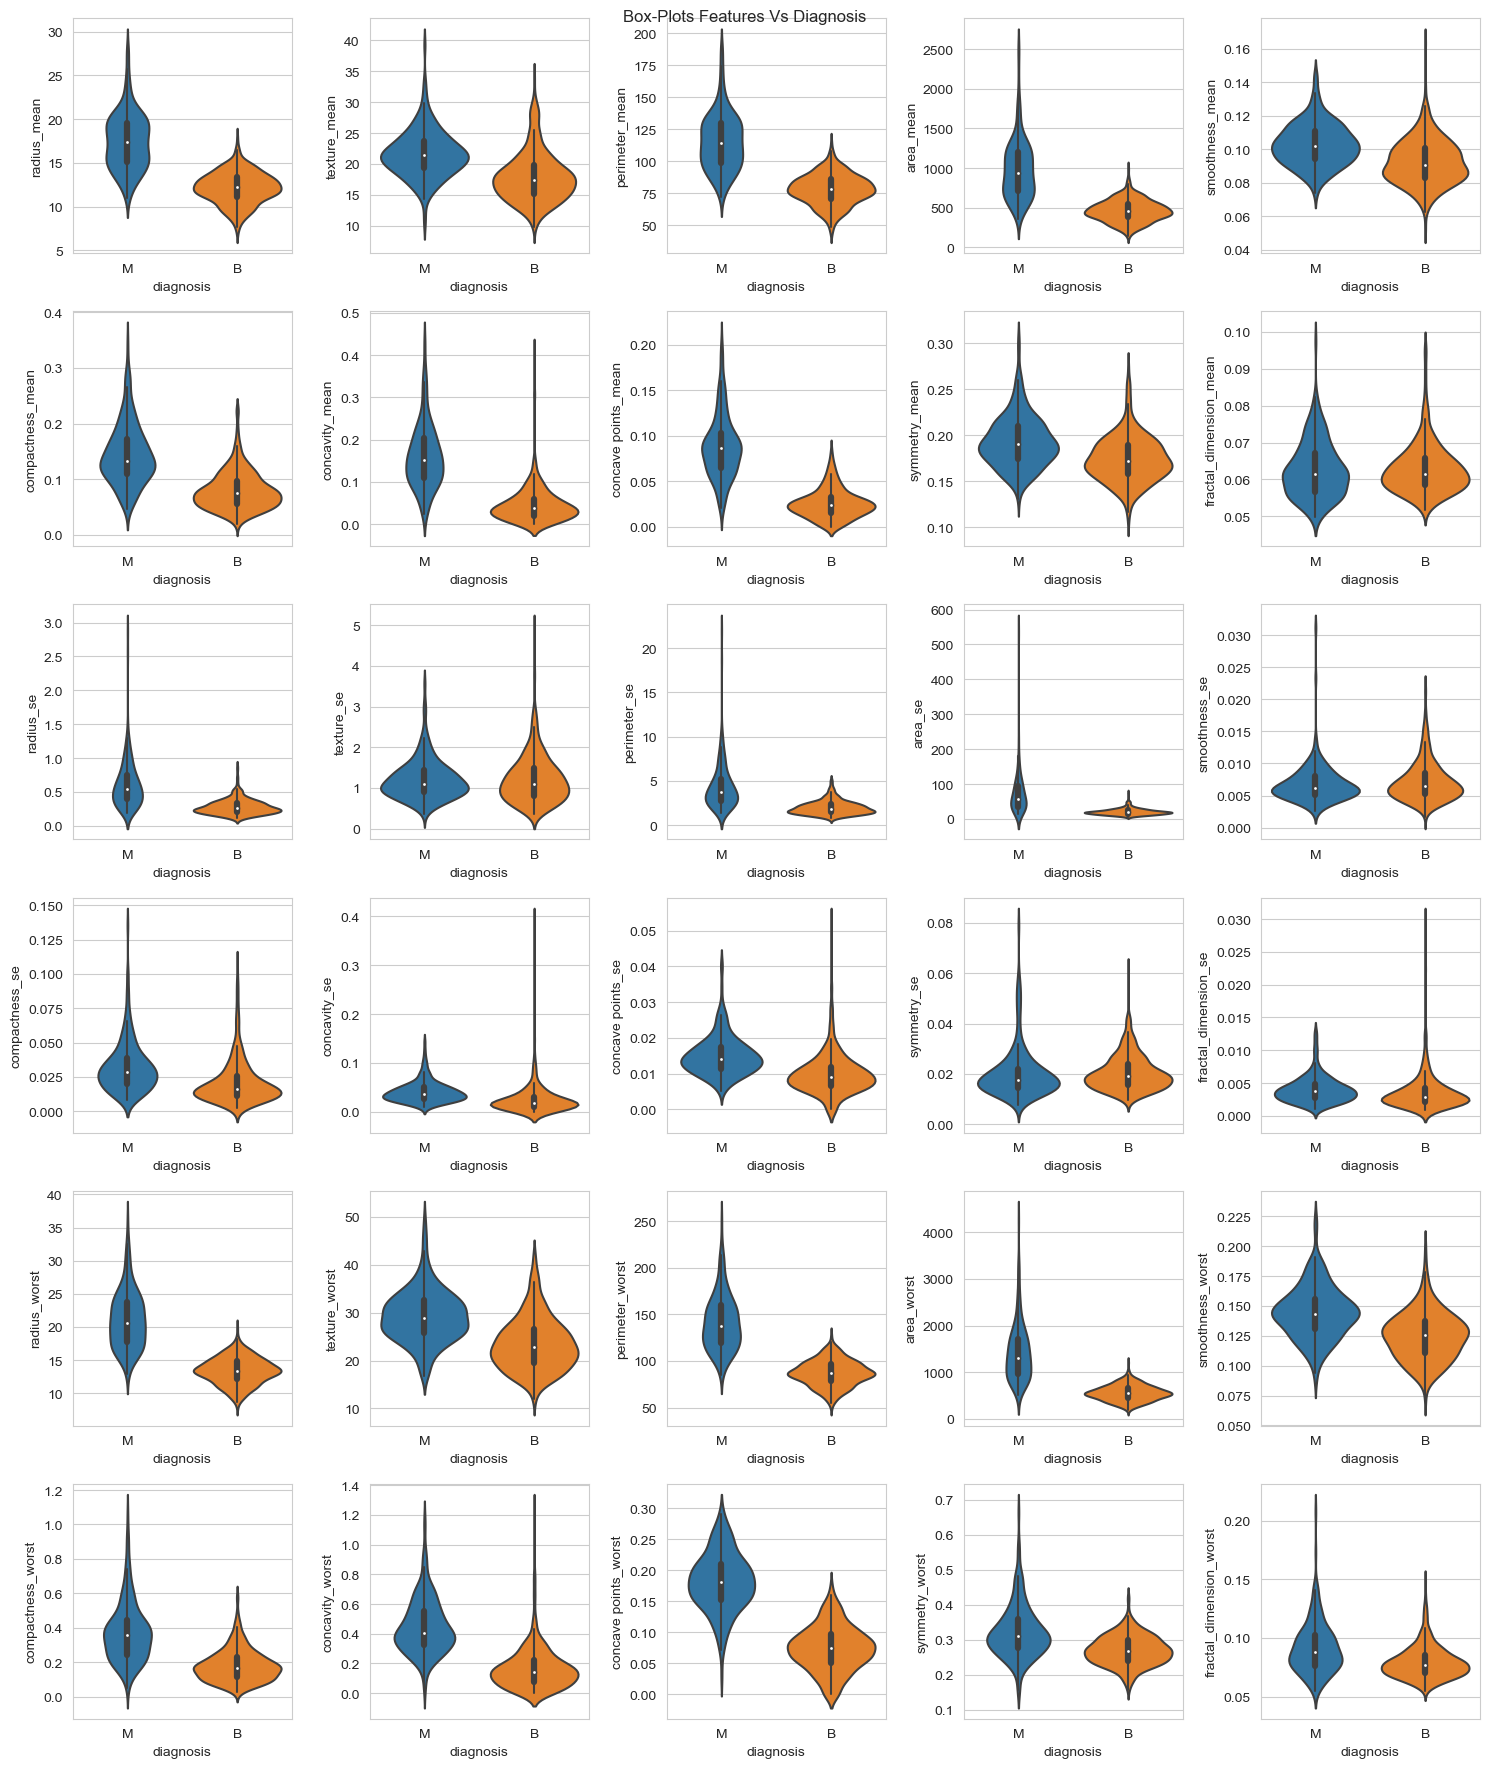

In [40]:
# Assuming 'cancer_df' is your dataframe and 'diagnosis' is one of its columns
sns.set_style("whitegrid")

# List of numerical variables
num_vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
            'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
            'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
            'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Calculate the number of rows and columns for subplots
num_rows = len(num_vars) // 5 + (len(num_vars) % 5 > 0)  # Ensure we have enough rows
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.suptitle('Box-Plots Features Vs Diagnosis')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical variables and create box plots
for i, var in enumerate(num_vars):
    sns.violinplot(ax=axes[i], x='diagnosis', y=var, data=cancer_df)

# Hide any extra subplots
for j in range(len(num_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

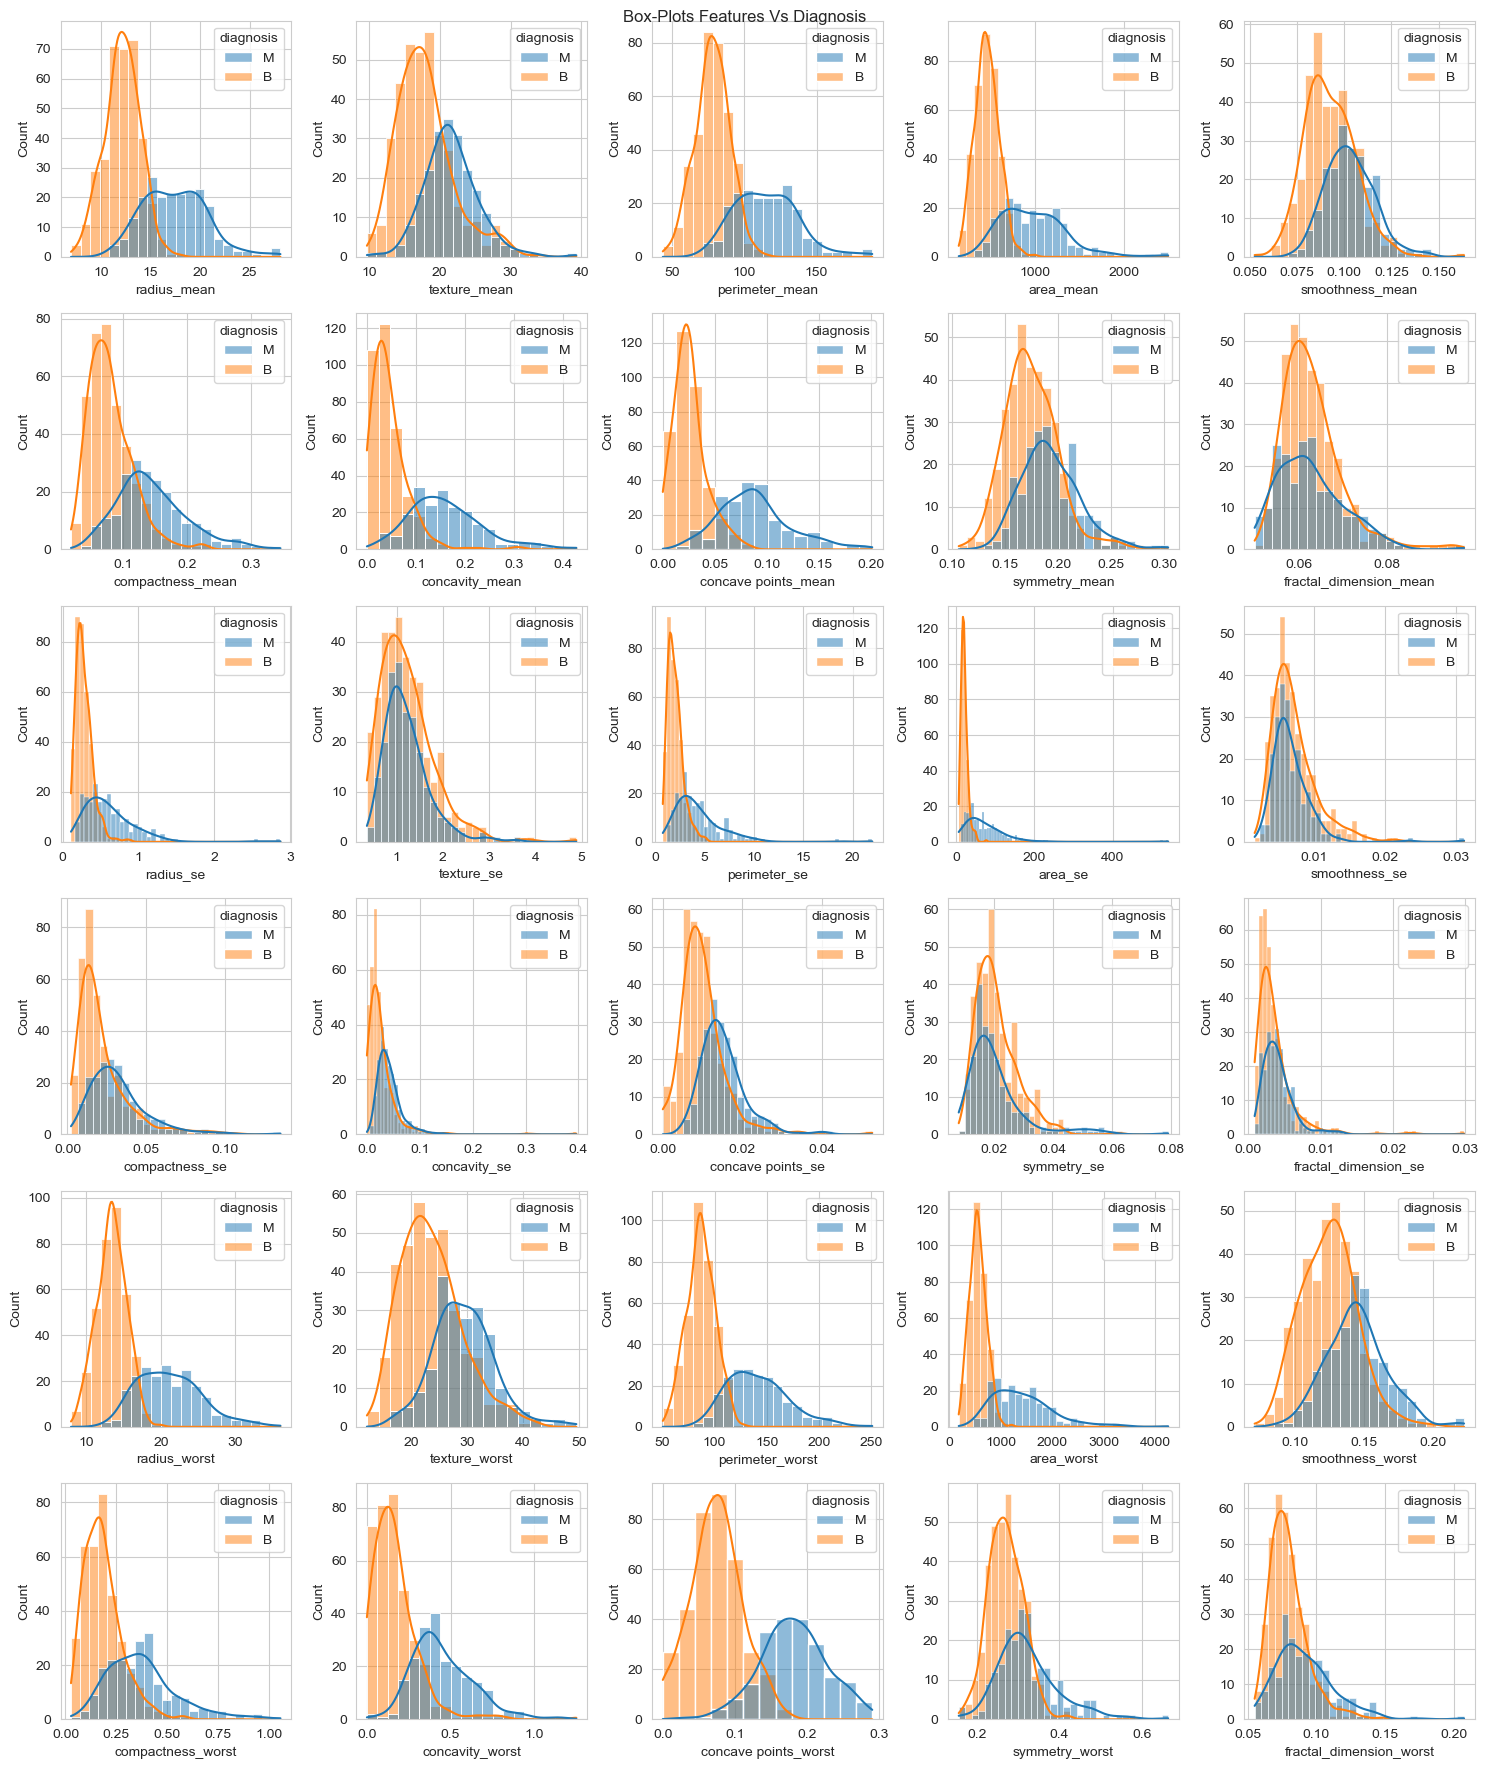

In [41]:
# Assuming 'cancer_df' is your dataframe and 'diagnosis' is one of its columns
sns.set_style("whitegrid")

# List of numerical variables
num_vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
            'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
            'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
            'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Calculate the number of rows and columns for subplots
num_rows = len(num_vars) // 5 + (len(num_vars) % 5 > 0)  # Ensure we have enough rows
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.suptitle('Box-Plots Features Vs Diagnosis')

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical variables and create box plots
for i, var in enumerate(num_vars):
    sns.histplot(ax=axes[i], hue='diagnosis', x=var, data=cancer_df,kde=True)

# Hide any extra subplots
for j in range(len(num_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [42]:
cancer_df=cancer_df.drop(['smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se',  'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst','smoothness_worst','compactness_worst'  ,'symmetry_worst','fractal_dimension_worst'],axis=1)

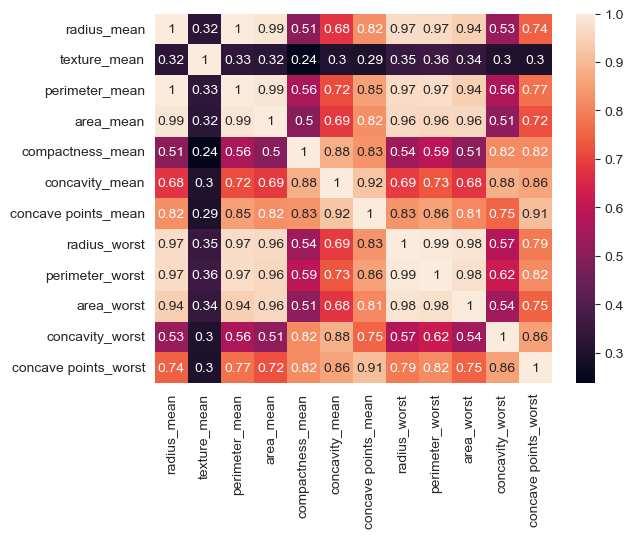

In [43]:
corr_mat=cancer_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

# 10. Data Transformation

# 11. Standization - Normalization

# 12. Convert Cat - to - Numerical Columns

In [44]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cancer_df['diagnosis']=le.fit_transform(cancer_df['diagnosis'])

In [46]:
cancer_df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

# 13. SMOTE for Balancing Data

In [47]:
Y=cancer_df["diagnosis"]
X=cancer_df.drop('diagnosis',axis=1)
print(X.columns)
print(len(Y),len(X))

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')
569 569


In [48]:
X, Y = SMOTE().fit_resample(X, Y)
print(X.columns)
print(len(Y),len(X))

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')
714 714


In [49]:
Y.value_counts()

diagnosis
1    357
0    357
Name: count, dtype: int64

## Observations
1. Balancing the dataset using SMOTE

# 14. ML Models

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [51]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [52]:
def metric_calssifcation(y_test, y_pred ,model):
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    

    print("Model",model)
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
  

    cmt = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=[False, True])
    disp.plot()
    plt.grid(False)
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Negative:", tn)
    print("False Positive:", fp)
    print("False Negative:", fn)
    print("True Positive:", tp)
    print("\n\n")

## 14.1 Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.9019264448336253
accuracy test score overall : 0.9090909090909091
Model Logistic Regression
Accuracy: 90.91
F1 Score: 0.91
Precision: 0.97
Recall: 0.85


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


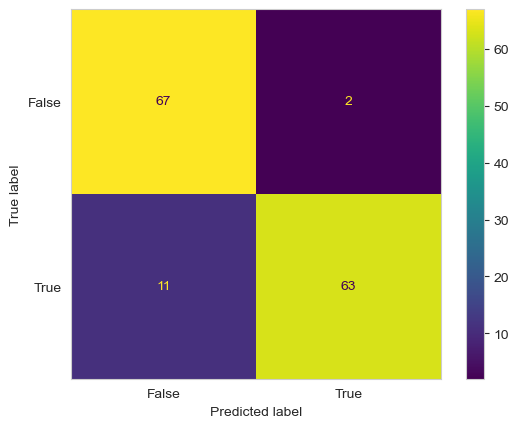

True Negative: 67
False Positive: 2
False Negative: 11
True Positive: 63





In [53]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
metric_calssifcation(y_test,y_pred,"Logistic Regression")

## 14.2 GaussianNB

Model-GaussianNB
train score 0.9439579684763573
test score 0.9300699300699301
Model GaussianNB
Accuracy: 90.91
F1 Score: 0.91
Precision: 0.97
Recall: 0.85


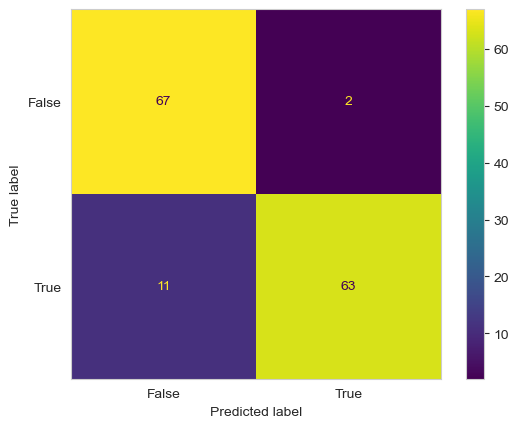

True Negative: 67
False Positive: 2
False Negative: 11
True Positive: 63





In [54]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,y_train))
print("test score",gnb_model.score(X_test,y_test))

y_pred = gnb_model.predict(X_test)
y_pred = lg_model.predict(X_test)
metric_calssifcation(y_test,y_pred,"GaussianNB")

## 14.3 Suport Vector Machine - Classifier

model-Suport Vector Machine - kernel - linear -Classifier
Train Accuracy: 0.9614711033274956
Model svm-linear
Accuracy: 97.2
F1 Score: 0.97
Precision: 1.0
Recall: 0.95


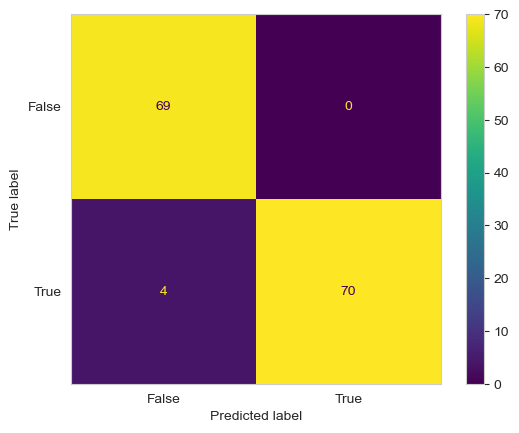

True Negative: 69
False Positive: 0
False Negative: 4
True Positive: 70





In [55]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_linear_classifier.fit(X_train, y_train)
print("model-Suport Vector Machine - kernel - linear -Classifier")

y_pred = svm_linear_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_linear_classifier.predict(X_test)
metric_calssifcation(y_test,y_pred,"svm-linear")

model-Suport Vector Machine - Kernel -rbf - Classifier
Train Accuracy: 0.9036777583187391
Model svm-rbf
Accuracy: 88.11
F1 Score: 0.88
Precision: 0.94
Recall: 0.82


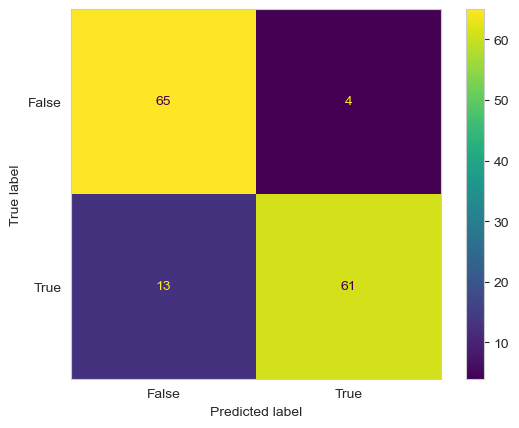

True Negative: 65
False Positive: 4
False Negative: 13
True Positive: 61





In [56]:
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_rbf_classifier.fit(X_train, y_train)
print("model-Suport Vector Machine - Kernel -rbf - Classifier")
y_pred = svm_rbf_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_rbf_classifier.predict(X_test)
# Calculate the accuracy of the model
metric_calssifcation(y_test,y_pred,"svm-rbf")

model-Suport Vector Machine - Kernel -poly - Classifier
Train Accuracy: 0.8949211908931699
Model svm-poly
Accuracy: 86.01
F1 Score: 0.85
Precision: 0.95
Recall: 0.77


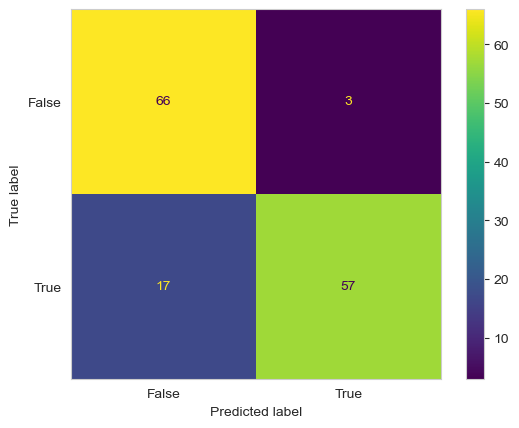

True Negative: 66
False Positive: 3
False Negative: 17
True Positive: 57





In [57]:
svm_poly_classifier = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_poly_classifier.fit(X_train, y_train)
print("model-Suport Vector Machine - Kernel -poly - Classifier")

y_pred = svm_poly_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_poly_classifier.predict(X_test)

metric_calssifcation(y_test,y_pred,"svm-poly")

## 14.4 Decision Tree

Model-Decion Tree
train score: 0.9947460595446584
test score: 0.951048951048951
Model DT
Accuracy: 95.1
F1 Score: 0.95
Precision: 0.95
Recall: 0.96


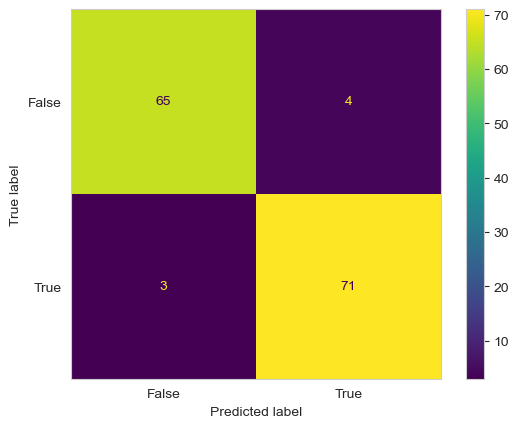

True Negative: 65
False Positive: 4
False Negative: 3
True Positive: 71





In [58]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
metric_calssifcation(y_test,y_pred,"DT")

## 14.5 Random Forest

Model- Random Forest Tree
train score: 0.9982486865148862
test score: 0.9440559440559441
Model RF
Accuracy: 94.41
F1 Score: 0.95
Precision: 0.93
Recall: 0.96


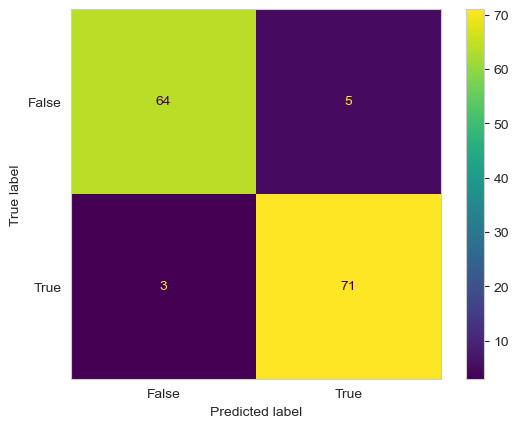

True Negative: 64
False Positive: 5
False Negative: 3
True Positive: 71





In [59]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
metric_calssifcation(y_test,y_pred,"RF")

## 14.6 AdaBoost 

Model-AdaBoost
train score 1.0
test score: 0.958041958041958
Model Ada
Accuracy: 95.8
F1 Score: 0.96
Precision: 0.95
Recall: 0.97


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


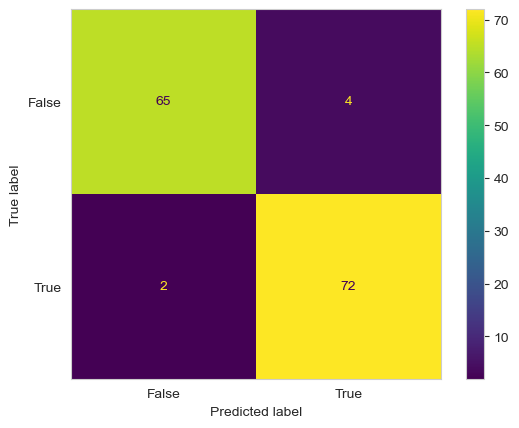

True Negative: 65
False Positive: 4
False Negative: 2
True Positive: 72





In [60]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"test score: {accuracy}")

metric_calssifcation(y_test,y_pred,"Ada")

## 14.7 GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.9649737302977233
Test Accuracy: 0.9440559440559441
Model GBoost
Accuracy: 94.41
F1 Score: 0.95
Precision: 0.95
Recall: 0.95


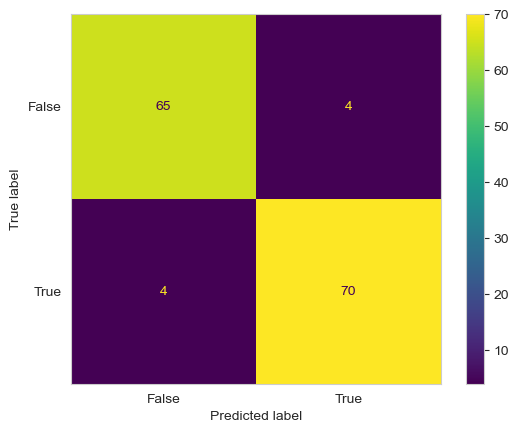

True Negative: 65
False Positive: 4
False Negative: 4
True Positive: 70





In [61]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, y_test)
print("Test Accuracy:", accuracy)

y_pred=gdb_clf.predict(X_test)
metric_calssifcation(y_test,y_pred,"GBoost")

## 14.8 XGBClassifier

model- XGB Classifier
Train Accuracy: 1.0
Test Accuracy: 0.958041958041958
Model XGB
Accuracy: 95.8
F1 Score: 0.96
Precision: 0.96
Recall: 0.96


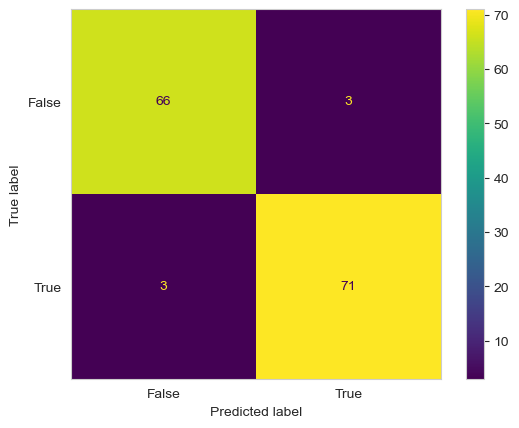

True Negative: 66
False Positive: 3
False Negative: 3
True Positive: 71





In [62]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

metric_calssifcation(y_test,y_pred,"XGB")

# Conlusion

Covered the following in the exercise
1. Data Exploration
2. Data Preprocessing
3. Model Building
4. Model Evaluation
5. Model Tuning
6. Documentation